In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

plt.style.use('dark_background')

import warnings
warnings.filterwarnings('ignore')

In [18]:
import math

def entropy( x, b ):
    s = 0
    for p in x:
        if p > 0:
            s += -p*math.log(p,b)
        # end
    # end
    return s
# end

def visualize_regions(model, MAX, nGrid):
    a1 = np.linspace(-MAX, MAX, nGrid)
    a2 = np.linspace(-MAX, MAX, nGrid)

    A1, A2 = np.meshgrid(a1, a2)
    A1 = A1.flatten()
    A2 = A2.flatten()
    A = np.vstack((A1, A2)).T

    # Predict B
    B = model.predict(A)
    B = B.reshape(nGrid, nGrid)
    B = np.flipud(B)

    # Compute entropy for S
    prob_2D = model.predict_proba(A)
    S = np.array([entropy(p, 2) for p in prob_2D])
    S = S.reshape(nGrid, nGrid)
    S = np.flipud(S)

    return B, S
# end
    
def GenerateData(n_pts1,n_pts2,center_sep,std):
    
    cov = std**2*np.eye(2)
    
    x1 = np.random.multivariate_normal(mean=[-center_sep/2,0],
                                       cov=cov,
                                       size=n_pts1)
    y1 = np.zeros(n_pts1)
    
    x2 = np.random.multivariate_normal(mean=[center_sep/2,0],
                                       cov=cov,
                                       size=n_pts2)
    y2 = np.ones(n_pts2)
    
    X = np.concatenate((x1,x2),axis=0)
    y = np.concatenate((y1,y2),axis=0).astype(int)
    
    return X, y
# end

# Create data

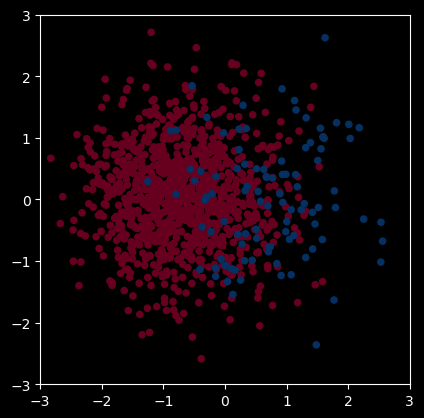

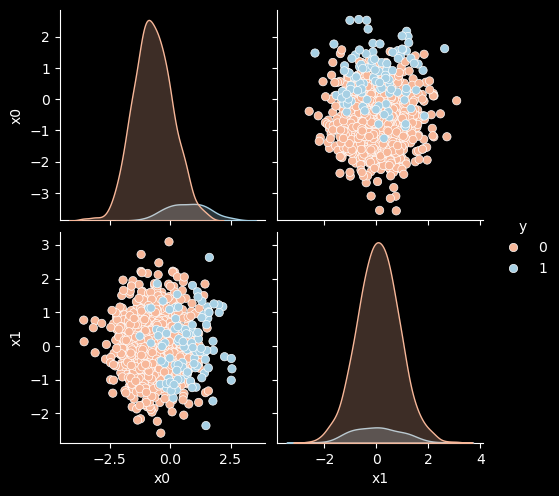

In [21]:
#np.random.seed(0)

n_pts0     = 1000
n_pts1     = 100
std        = 0.8
center_sep = 1.5

# generate data
X, y = GenerateData(
    n_pts0,
    n_pts1,
    center_sep,
    std
)

MAX = np.max(np.abs(X))

cmap = 'RdBu'

plt_scale = 3
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap=cmap)
plt.xlim(-plt_scale,plt_scale)
plt.ylim(-plt_scale,plt_scale)
plt.gca().set_aspect('equal')
plt.show()

df = pd.DataFrame( {"x0":X[:,0], "x1":X[:,1], "y":y} )
sns.pairplot(df, hue='y', palette='RdBu')
plt.show()

# Modeling w/o balancing

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
)

print("Original data:")
print(pd.Series(y).value_counts())
print()
print("Training data:")
print(pd.Series(y_train).value_counts())
print()
print("Testing data:")
print(pd.Series(y_test).value_counts())

Original data:
0    1000
1     100
Name: count, dtype: int64

Training data:
0    800
1     80
Name: count, dtype: int64

Testing data:
0    200
1     20
Name: count, dtype: int64


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = [
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors=1,   weights='uniform'),
    KNeighborsClassifier(n_neighbors=5,   weights='uniform'),
    KNeighborsClassifier(n_neighbors=10,  weights='uniform'),
    KNeighborsClassifier(n_neighbors=50,  weights='uniform'),
    RandomForestClassifier(n_estimators=10,  max_leaf_nodes=3),
    RandomForestClassifier(n_estimators=10,  max_leaf_nodes=10),
    RandomForestClassifier(n_estimators=100, max_leaf_nodes=3),
    RandomForestClassifier(n_estimators=100, max_leaf_nodes=10),
    RandomForestClassifier(n_estimators=100, max_leaf_nodes=30),
    GradientBoostingClassifier(n_estimators=10,  learning_rate=0.1, max_leaf_nodes=3),
    GradientBoostingClassifier(n_estimators=10,  learning_rate=0.1, max_leaf_nodes=10),
    GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_leaf_nodes=3),
    GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_leaf_nodes=10),
]

LogisticRegression()
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       200
           1       0.43      0.30      0.35        20

    accuracy                           0.90       220
   macro avg       0.68      0.63      0.65       220
weighted avg       0.89      0.90      0.89       220



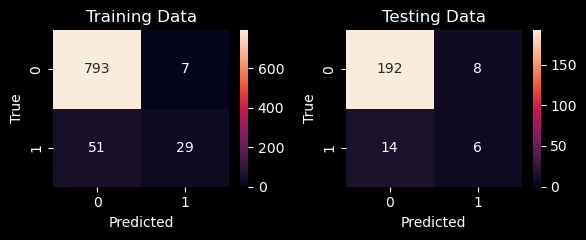

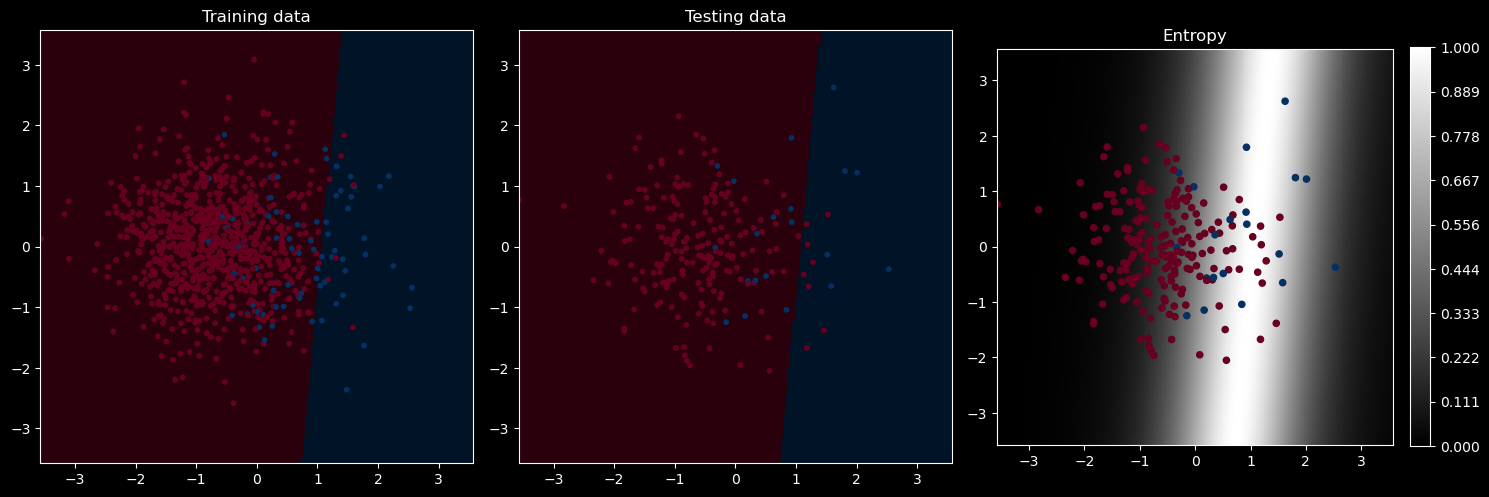

KNeighborsClassifier(n_neighbors=1)
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       200
           1       0.35      0.45      0.39        20

    accuracy                           0.87       220
   macro avg       0.64      0.68      0.66       220
weighted avg       0.89      0.87      0.88       220



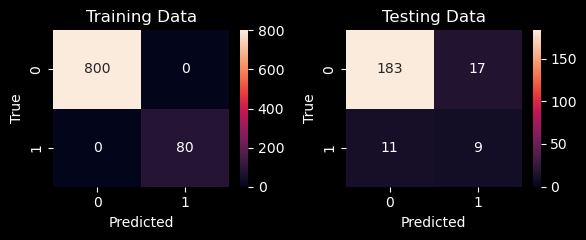

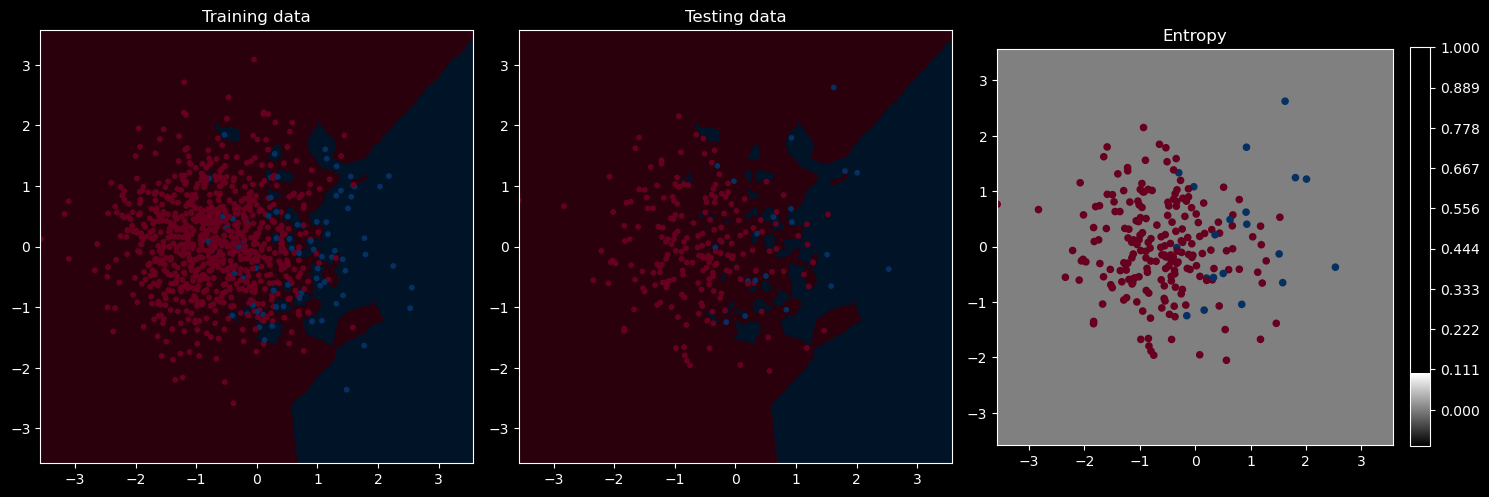

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       200
           1       0.44      0.35      0.39        20

    accuracy                           0.90       220
   macro avg       0.69      0.65      0.67       220
weighted avg       0.89      0.90      0.89       220



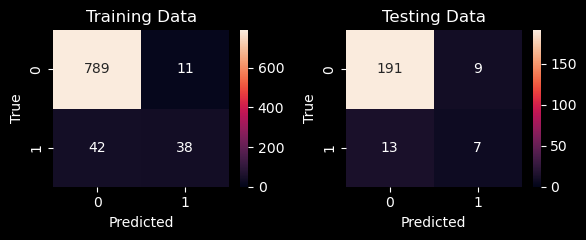

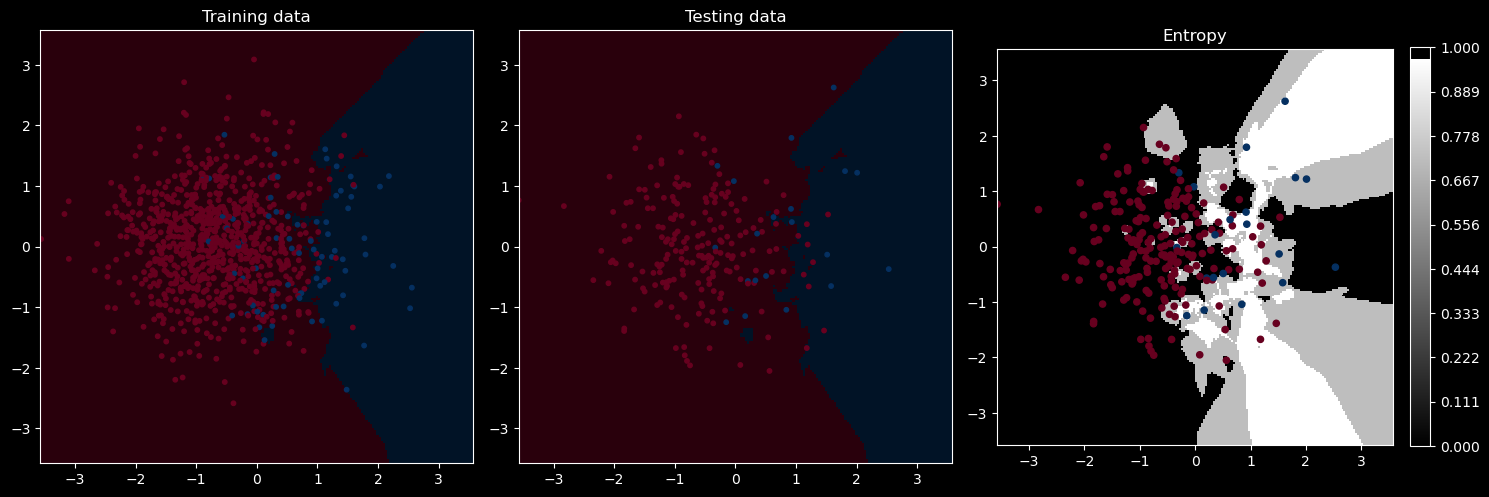

KNeighborsClassifier(n_neighbors=10)
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       200
           1       0.45      0.25      0.32        20

    accuracy                           0.90       220
   macro avg       0.69      0.61      0.64       220
weighted avg       0.89      0.90      0.89       220



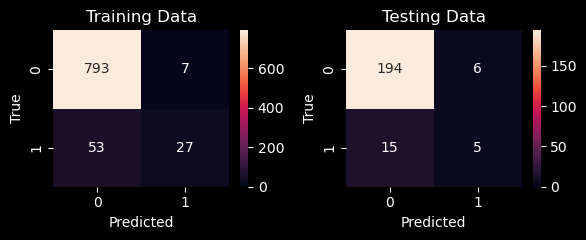

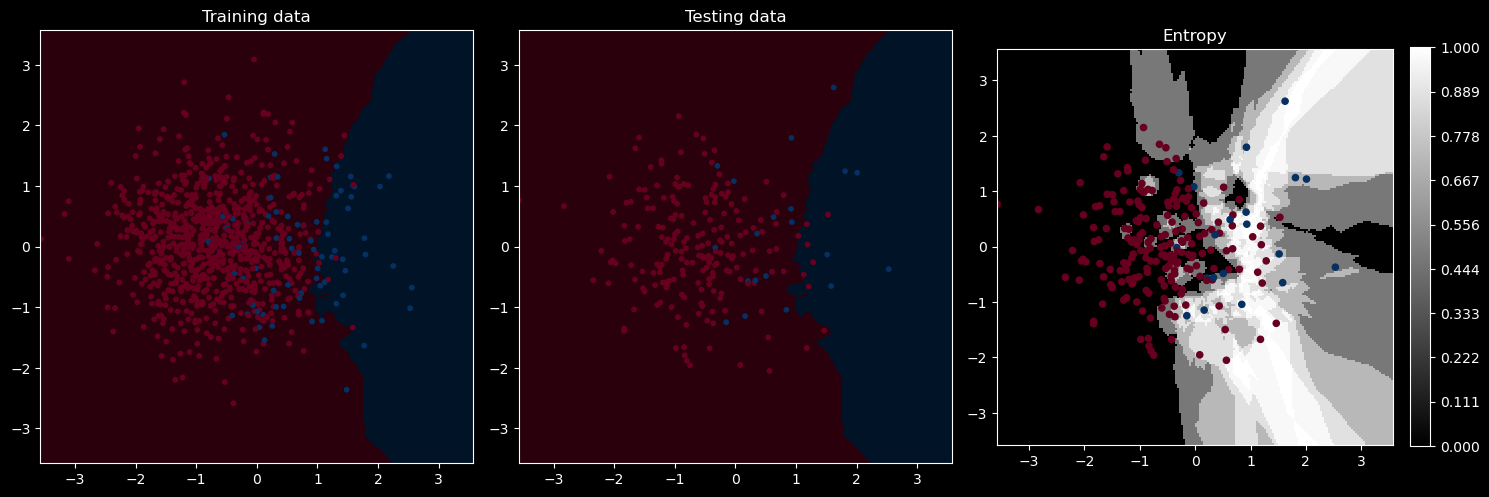

KNeighborsClassifier(n_neighbors=50)
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       200
           1       0.75      0.15      0.25        20

    accuracy                           0.92       220
   macro avg       0.84      0.57      0.60       220
weighted avg       0.91      0.92      0.89       220



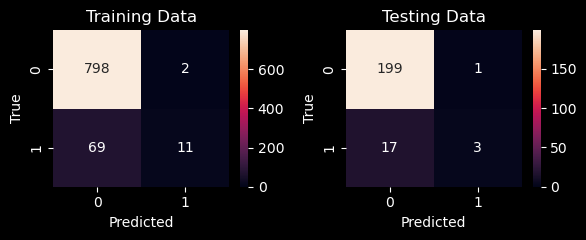

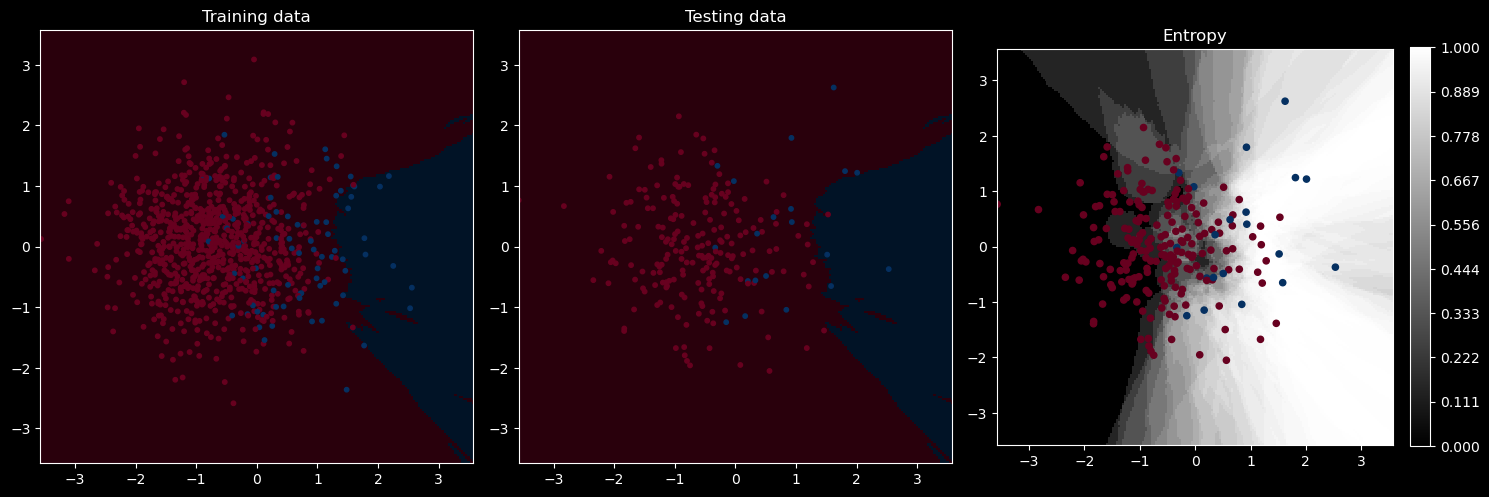

RandomForestClassifier(max_leaf_nodes=3, n_estimators=10)
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       200
           1       0.44      0.35      0.39        20

    accuracy                           0.90       220
   macro avg       0.69      0.65      0.67       220
weighted avg       0.89      0.90      0.89       220



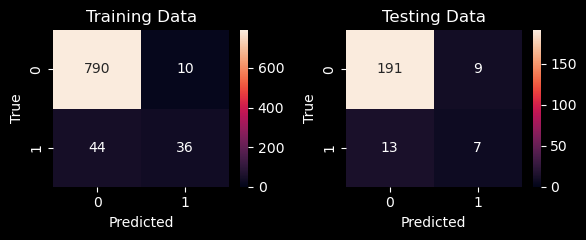

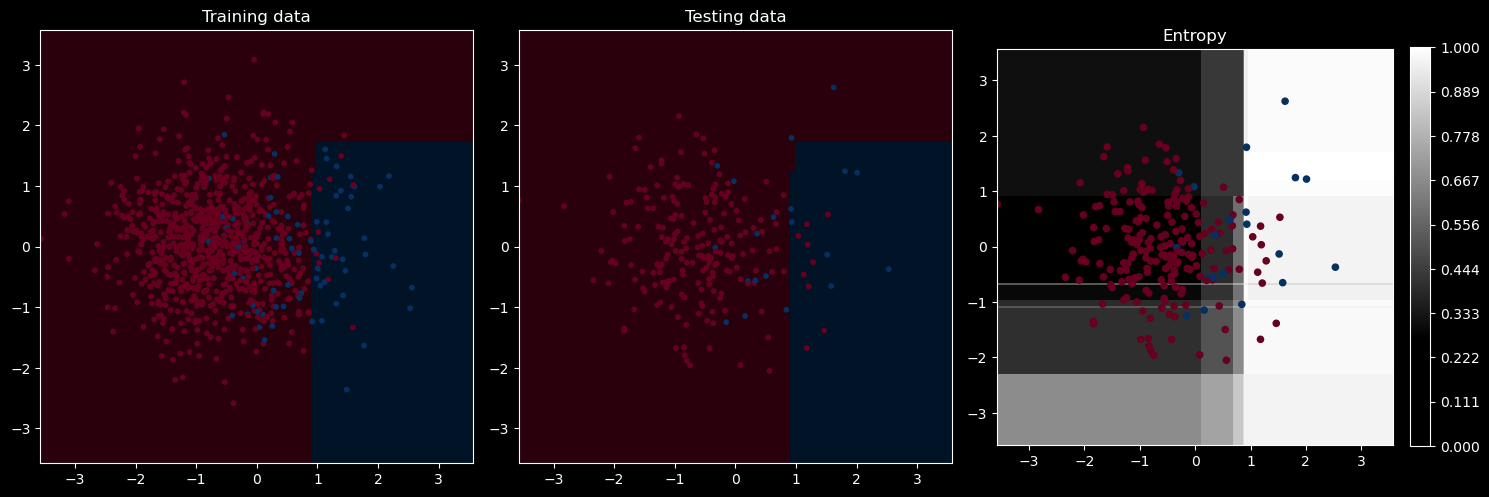

RandomForestClassifier(max_leaf_nodes=10, n_estimators=10)
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       200
           1       0.47      0.40      0.43        20

    accuracy                           0.90       220
   macro avg       0.71      0.68      0.69       220
weighted avg       0.90      0.90      0.90       220



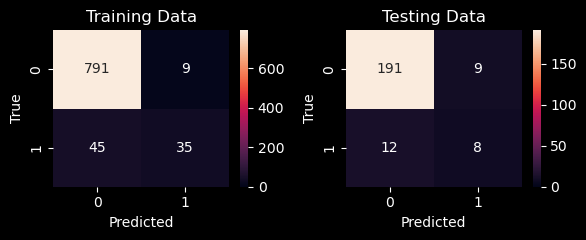

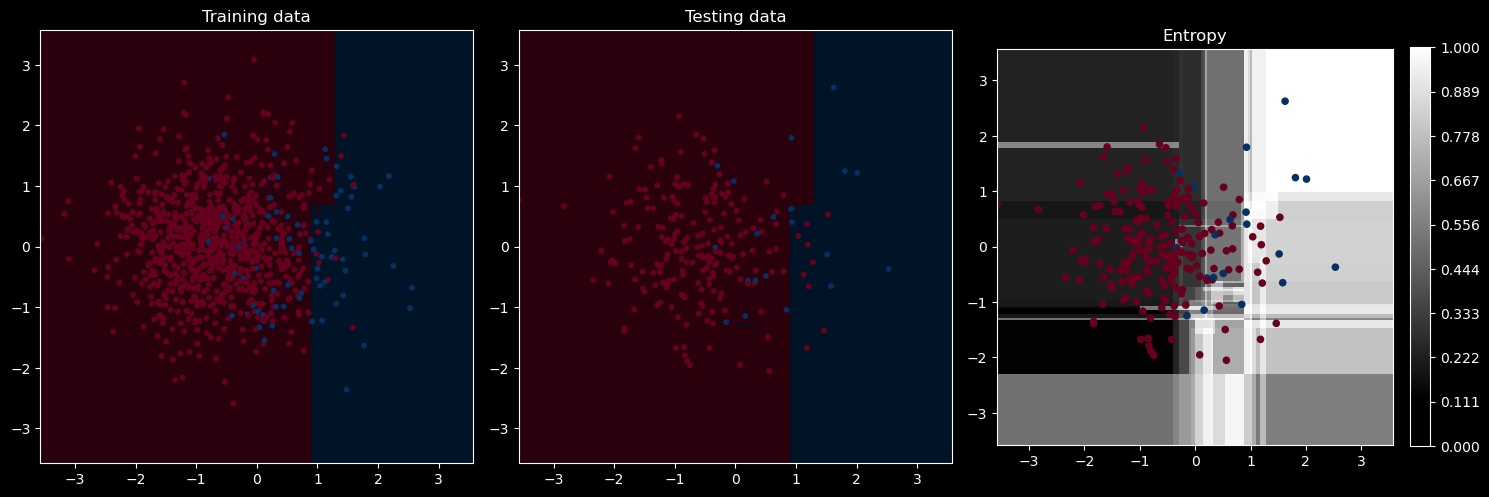

RandomForestClassifier(max_leaf_nodes=3)
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       200
           1       0.44      0.35      0.39        20

    accuracy                           0.90       220
   macro avg       0.69      0.65      0.67       220
weighted avg       0.89      0.90      0.89       220



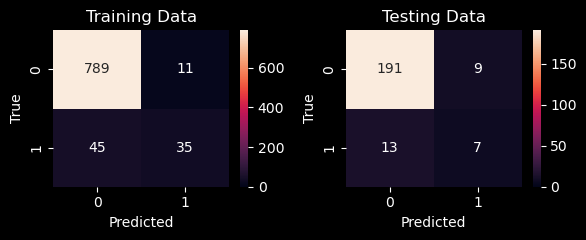

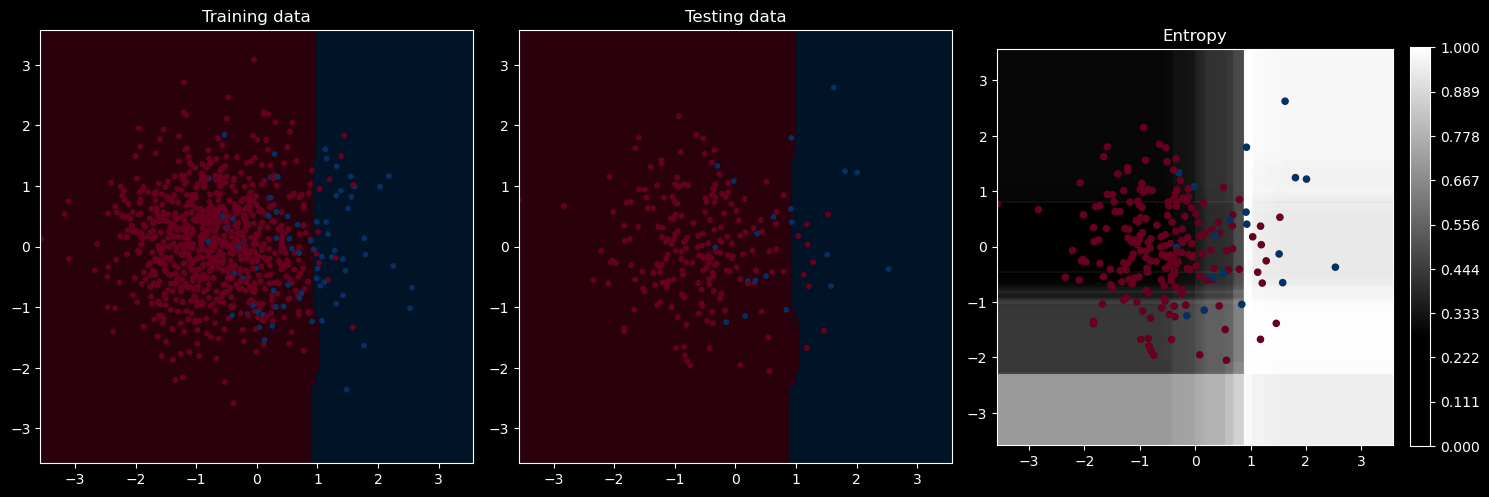

RandomForestClassifier(max_leaf_nodes=10)
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       200
           1       0.44      0.35      0.39        20

    accuracy                           0.90       220
   macro avg       0.69      0.65      0.67       220
weighted avg       0.89      0.90      0.89       220



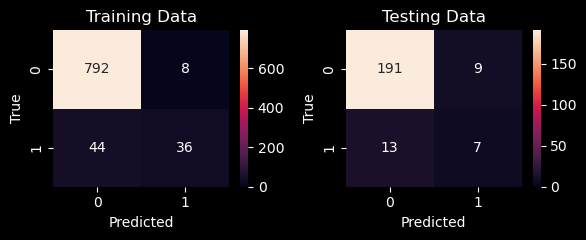

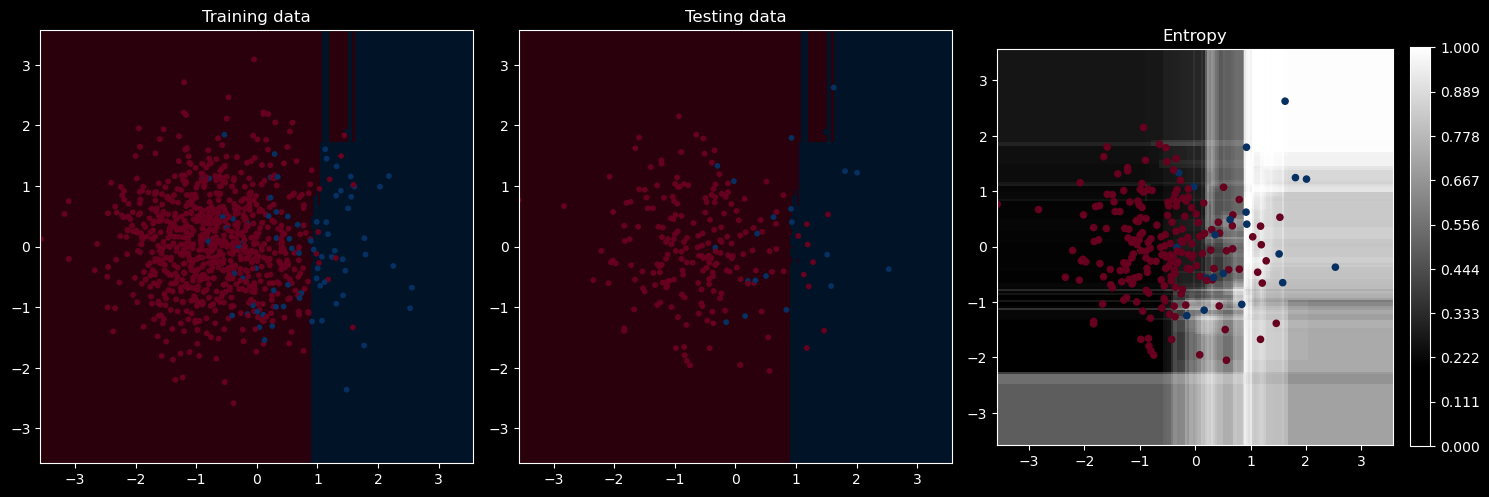

RandomForestClassifier(max_leaf_nodes=30)
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       200
           1       0.47      0.35      0.40        20

    accuracy                           0.90       220
   macro avg       0.70      0.66      0.67       220
weighted avg       0.89      0.90      0.90       220



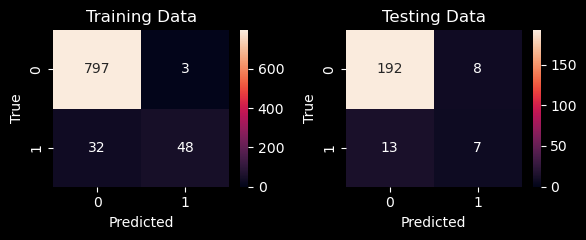

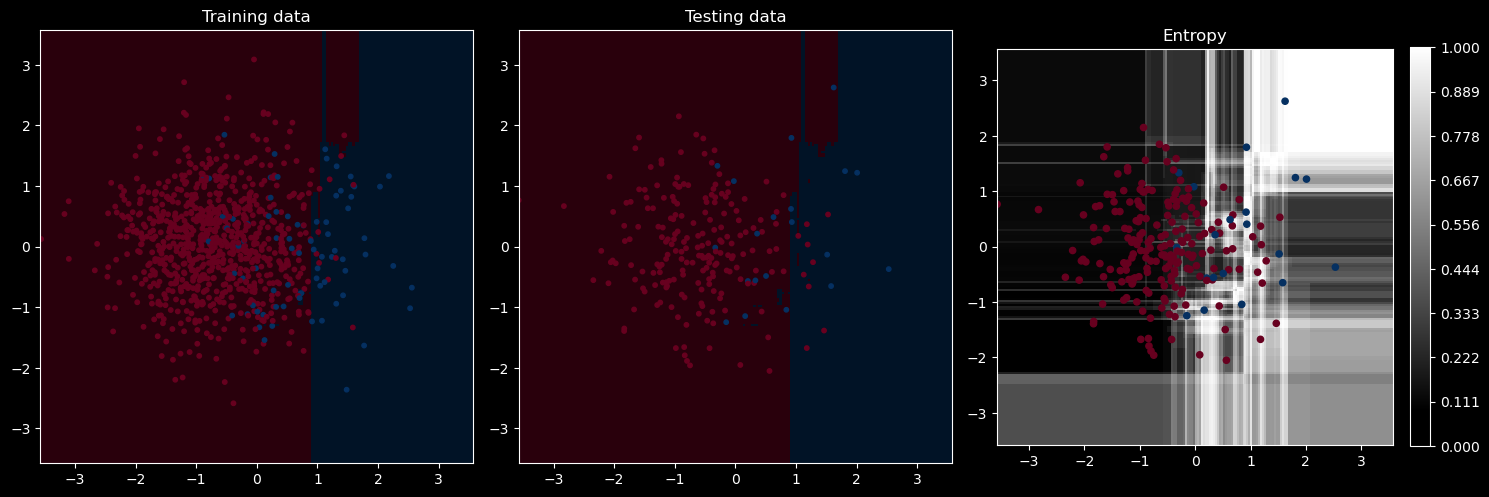

GradientBoostingClassifier(max_leaf_nodes=3, n_estimators=10)
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       200
           1       0.43      0.30      0.35        20

    accuracy                           0.90       220
   macro avg       0.68      0.63      0.65       220
weighted avg       0.89      0.90      0.89       220



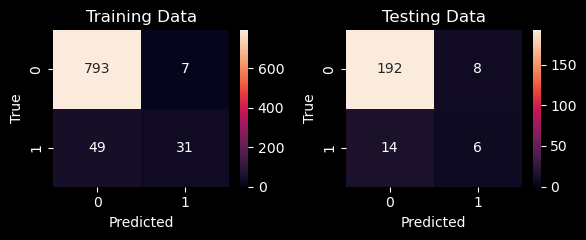

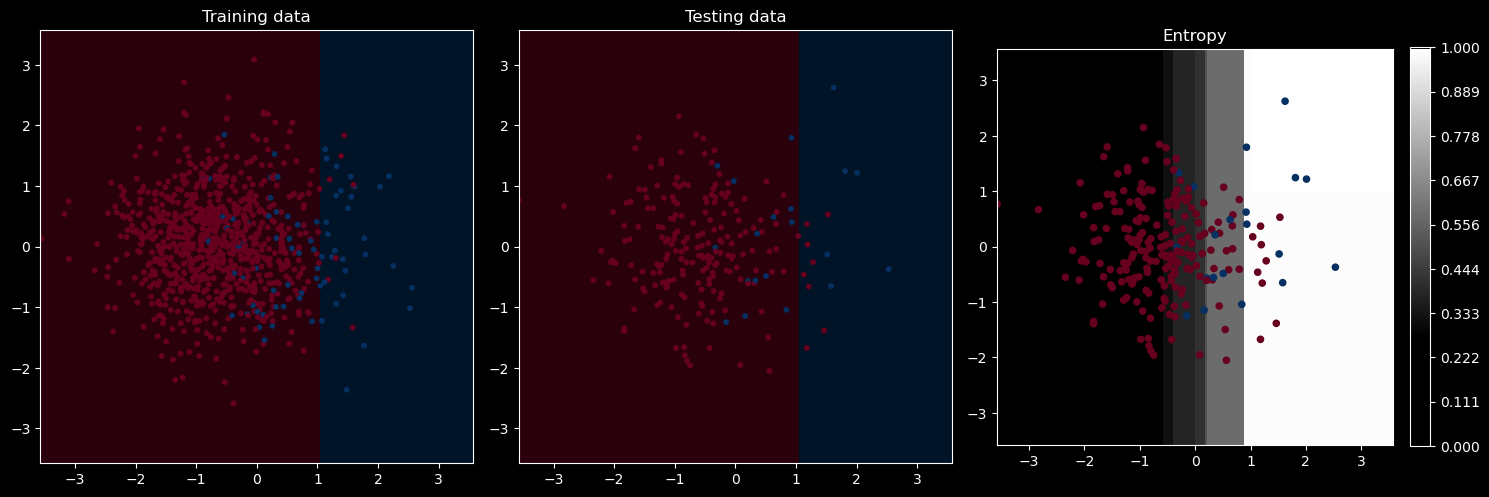

GradientBoostingClassifier(max_leaf_nodes=10, n_estimators=10)
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       200
           1       0.38      0.25      0.30        20

    accuracy                           0.90       220
   macro avg       0.66      0.60      0.62       220
weighted avg       0.88      0.90      0.89       220



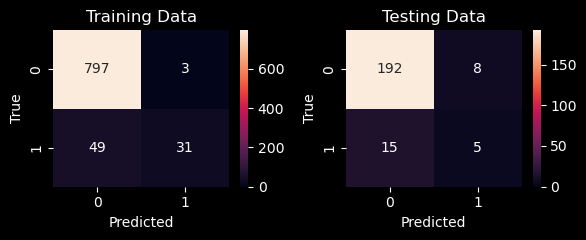

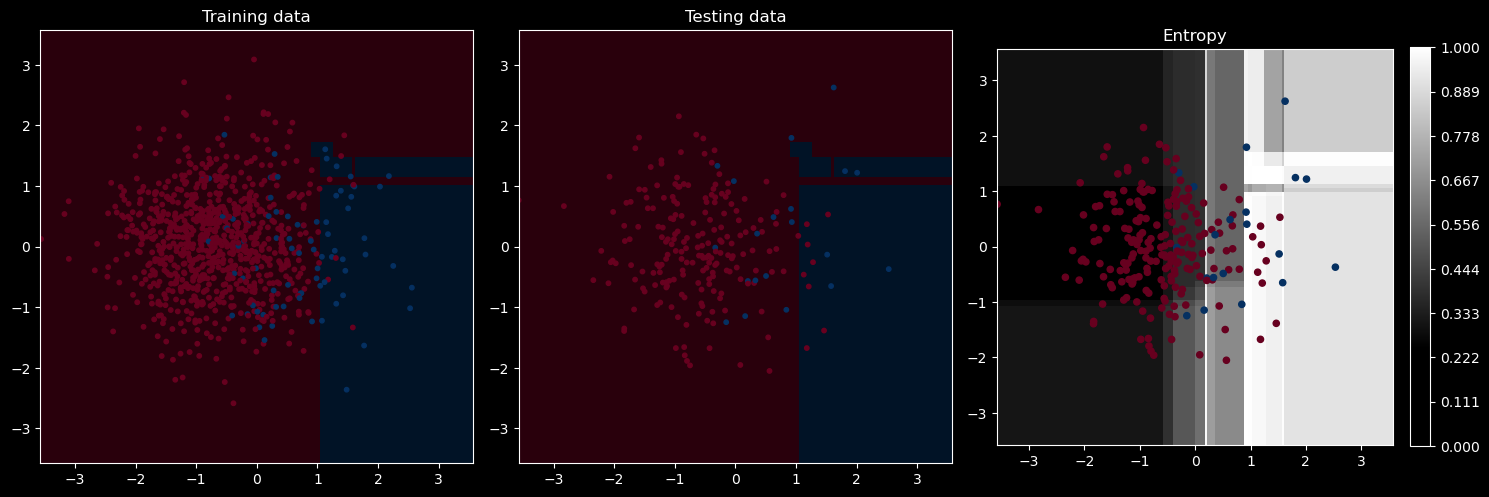

GradientBoostingClassifier(max_leaf_nodes=3)
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       200
           1       0.50      0.40      0.44        20

    accuracy                           0.91       220
   macro avg       0.72      0.68      0.70       220
weighted avg       0.90      0.91      0.90       220



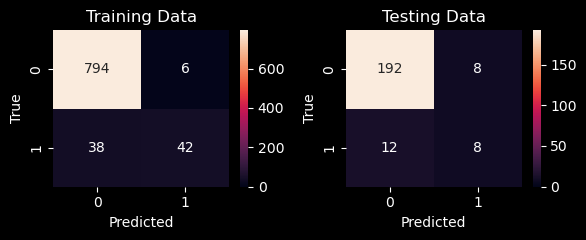

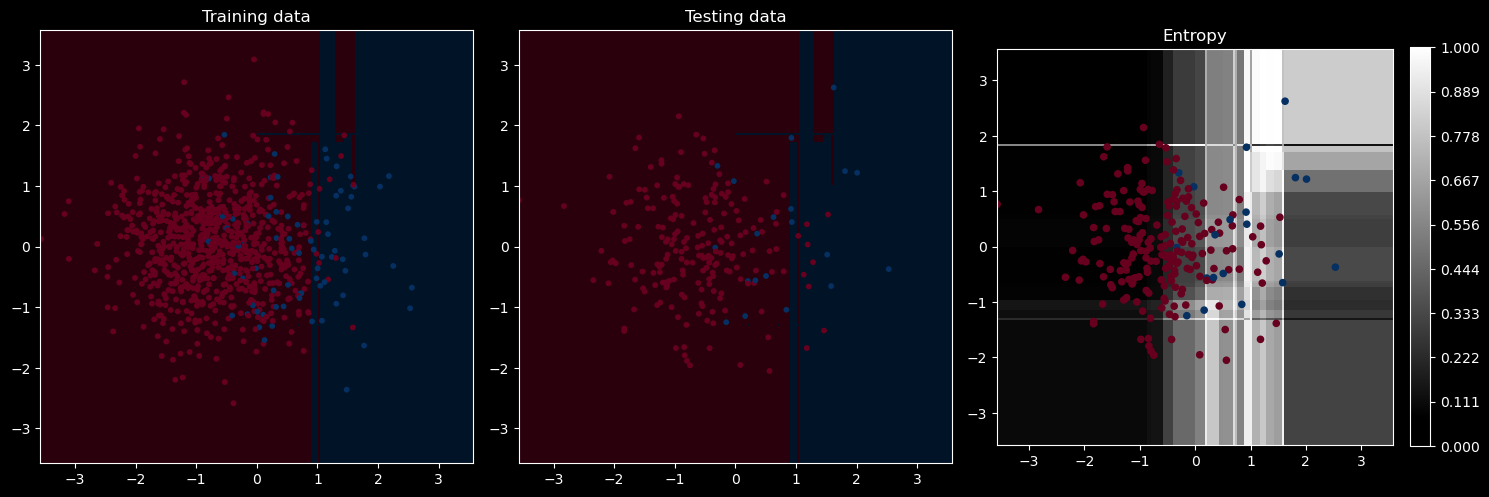

GradientBoostingClassifier(max_leaf_nodes=10)
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       200
           1       0.50      0.35      0.41        20

    accuracy                           0.91       220
   macro avg       0.72      0.66      0.68       220
weighted avg       0.90      0.91      0.90       220



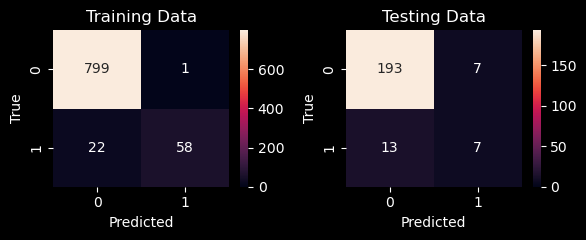

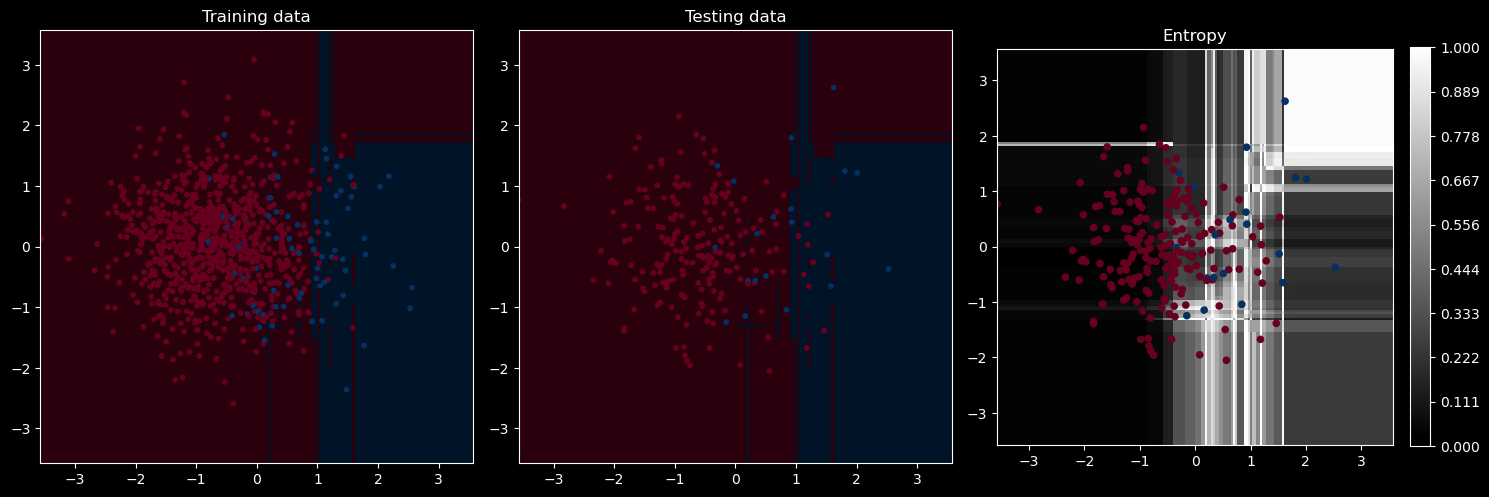

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

for m in models:
    m.fit(X_train, y_train)
    y_train_pred = m.predict(X_train).astype(int)
    y_test_pred = m.predict(X_test).astype(int)
    
    print(m)
    print(classification_report(y_test, y_test_pred))
    
    conf_matrix_train = confusion_matrix(y_train, y_train_pred)
    conf_matrix_test = confusion_matrix(y_test, y_test_pred)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 2.5))
    
    sns.heatmap(conf_matrix_train, annot=True, vmin=0, fmt='d', ax=axes[0])
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("True")
    axes[0].set_title("Training Data")
    
    sns.heatmap(conf_matrix_test, annot=True, vmin=0, fmt='d', ax=axes[1])
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("True")
    axes[1].set_title("Testing Data")
    
    plt.tight_layout()
    plt.show()

    B, S = visualize_regions(m, MAX, 200)
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
    
    extent = [-MAX,MAX,-MAX,MAX]
    
    cmap = "RdBu"
    axes[0].imshow(B, interpolation='none', extent=extent,cmap=cmap, alpha=0.4)
    axes[0].scatter(X_train[:,0], X_train[:,1], c=y_train, s=10, cmap=cmap);
    axes[0].set_aspect('equal')
    axes[0].set_title('Training data');
    
    axes[1].imshow(B, interpolation='none', extent=extent,cmap=cmap, alpha=0.4)
    axes[1].scatter(X_test[:,0], X_test[:,1], c=y_test, s=10, cmap=cmap);
    axes[1].set_aspect('equal')
    axes[1].set_title('Testing data');
    
    im = axes[2].imshow(S, interpolation='none', extent=extent,cmap='gray')
    axes[2].scatter(X_test[:,0], X_test[:,1], c=y_test, s=20, cmap=cmap);
    axes[2].set_aspect('equal')
    axes[2].set_title('Entropy')
    cbar = fig.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04)
    cbar.set_ticks(np.linspace(0, math.log(y.max()+1,2), 10))

    plt.tight_layout()
    plt.show()
# end

# Modeling w/ manual balancing via resampling

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
)

In [25]:
n_resamp = 1000

idx_train_0 = np.where(y_train==0)[0]
idx_train_1 = np.where(y_train==1)[0]

idx_train_0 = np.random.choice(idx_train_0, n_resamp)
idx_train_1 = np.random.choice(idx_train_1, n_resamp)

X_train_bal = np.concatenate(
    ( X_train[idx_train_0,:], X_train[idx_train_1,:] ),
    axis=0
)

y_train_bal = np.concatenate(
    ( y_train[idx_train_0], y_train[idx_train_1] ),
    axis=0
)

print("Original data:")
print(pd.Series(y).value_counts())
print()
print("Training data:")
print(pd.Series(y_train_bal).value_counts())
print()
print("Testing data:")
print(pd.Series(y_test).value_counts())

Original data:
0    1000
1     100
Name: count, dtype: int64

Training data:
0    1000
1    1000
Name: count, dtype: int64

Testing data:
0    200
1     20
Name: count, dtype: int64


LogisticRegression()
              precision    recall  f1-score   support

           0       0.98      0.81      0.89       200
           1       0.31      0.85      0.46        20

    accuracy                           0.82       220
   macro avg       0.65      0.83      0.68       220
weighted avg       0.92      0.82      0.85       220



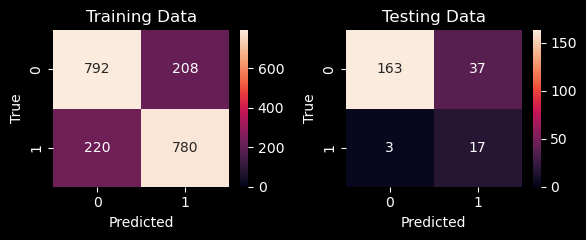

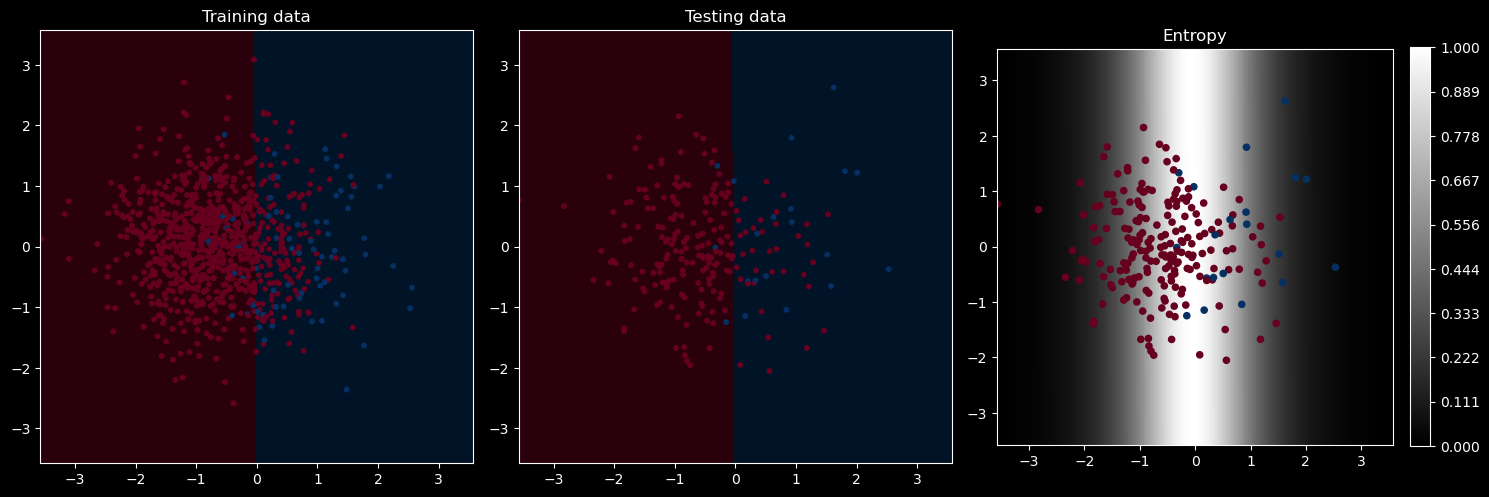

KNeighborsClassifier(n_neighbors=1)
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       200
           1       0.34      0.55      0.42        20

    accuracy                           0.86       220
   macro avg       0.65      0.72      0.67       220
weighted avg       0.90      0.86      0.88       220



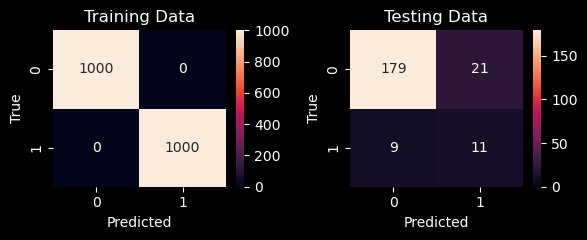

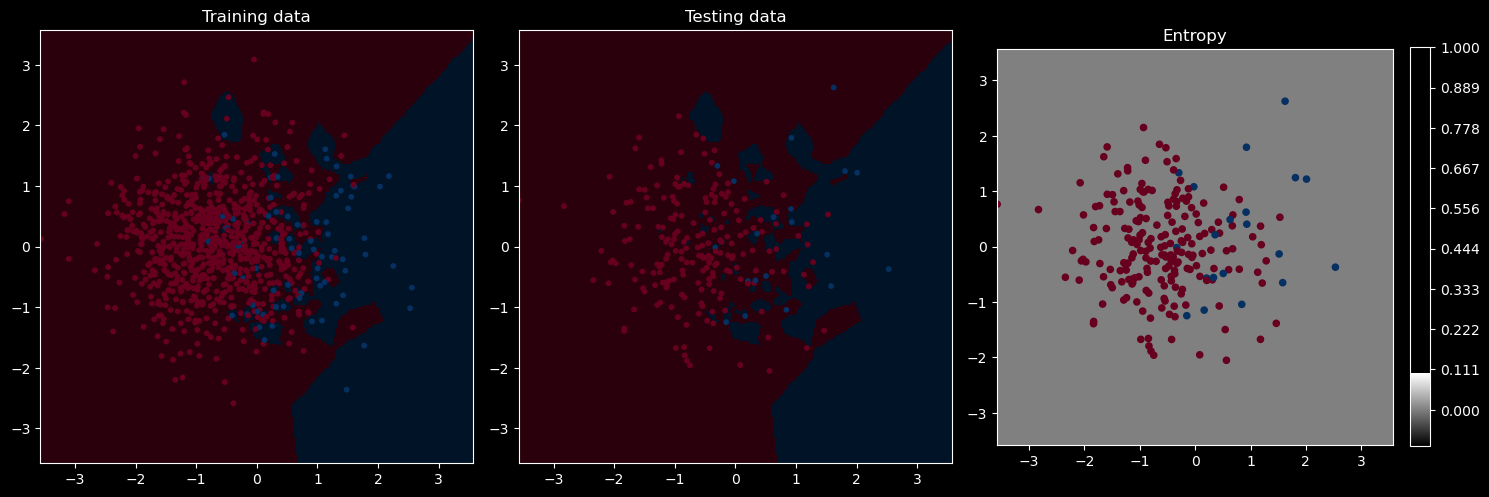

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.96      0.84      0.90       200
           1       0.30      0.65      0.41        20

    accuracy                           0.83       220
   macro avg       0.63      0.75      0.65       220
weighted avg       0.90      0.83      0.85       220



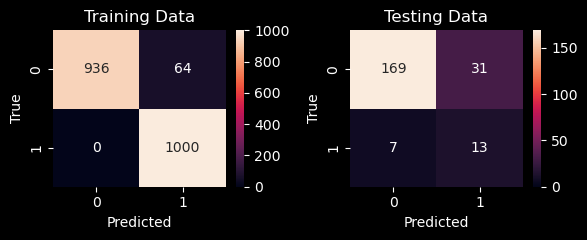

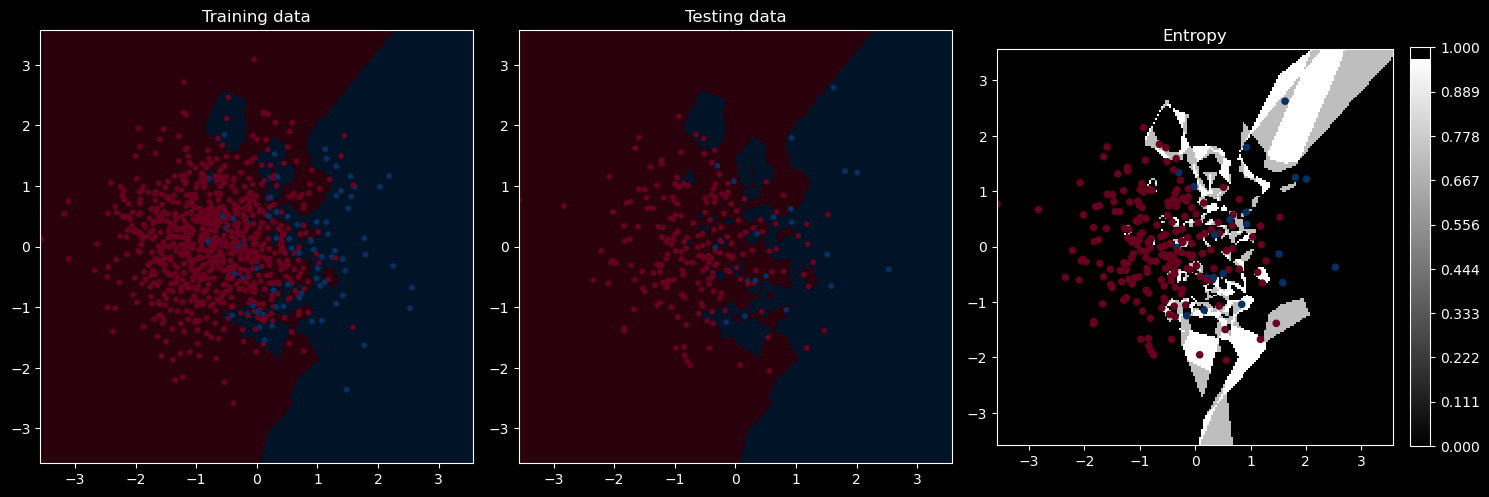

KNeighborsClassifier(n_neighbors=10)
              precision    recall  f1-score   support

           0       0.97      0.81      0.89       200
           1       0.29      0.75      0.42        20

    accuracy                           0.81       220
   macro avg       0.63      0.78      0.65       220
weighted avg       0.91      0.81      0.84       220



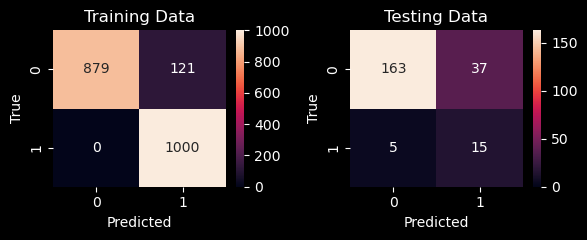

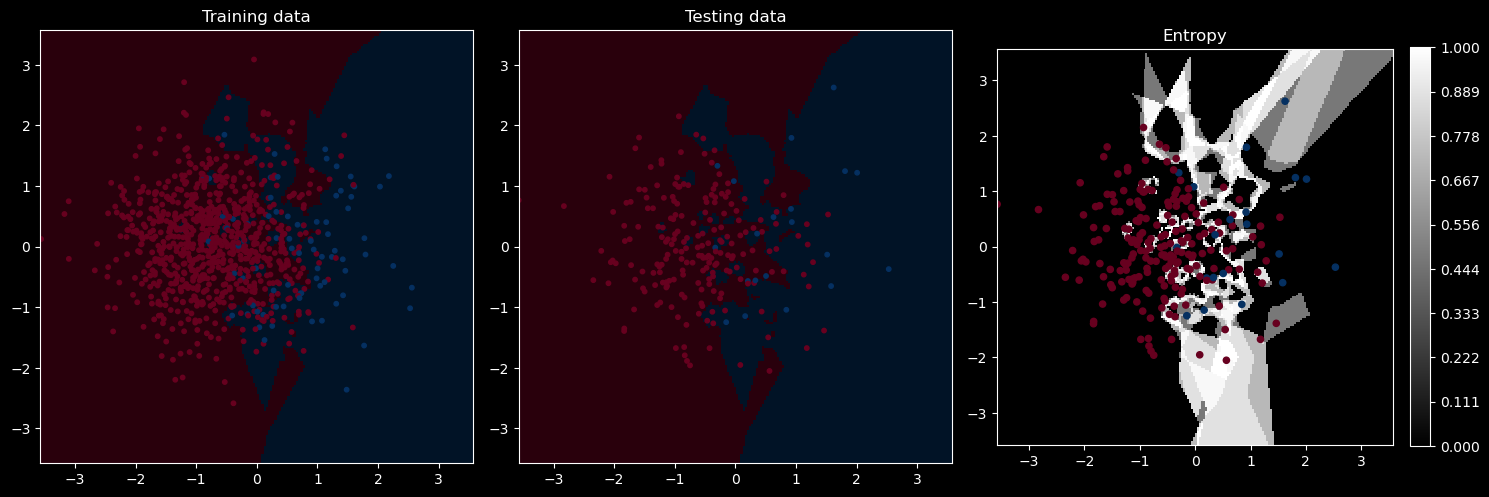

KNeighborsClassifier(n_neighbors=50)
              precision    recall  f1-score   support

           0       0.97      0.80      0.88       200
           1       0.27      0.75      0.40        20

    accuracy                           0.80       220
   macro avg       0.62      0.78      0.64       220
weighted avg       0.91      0.80      0.83       220



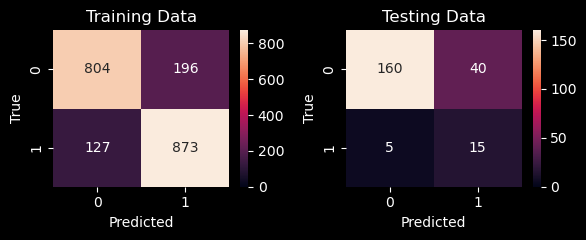

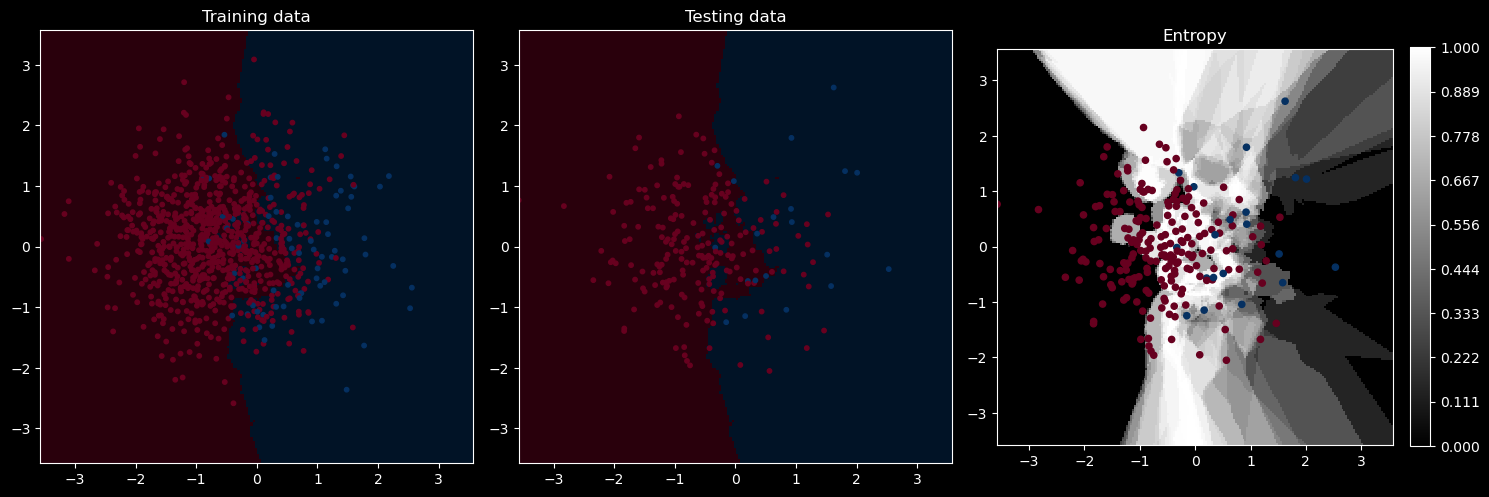

RandomForestClassifier(max_leaf_nodes=3, n_estimators=10)
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       200
           1       0.33      0.85      0.48        20

    accuracy                           0.83       220
   macro avg       0.66      0.84      0.69       220
weighted avg       0.92      0.83      0.86       220



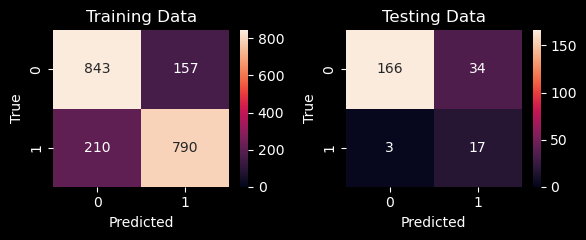

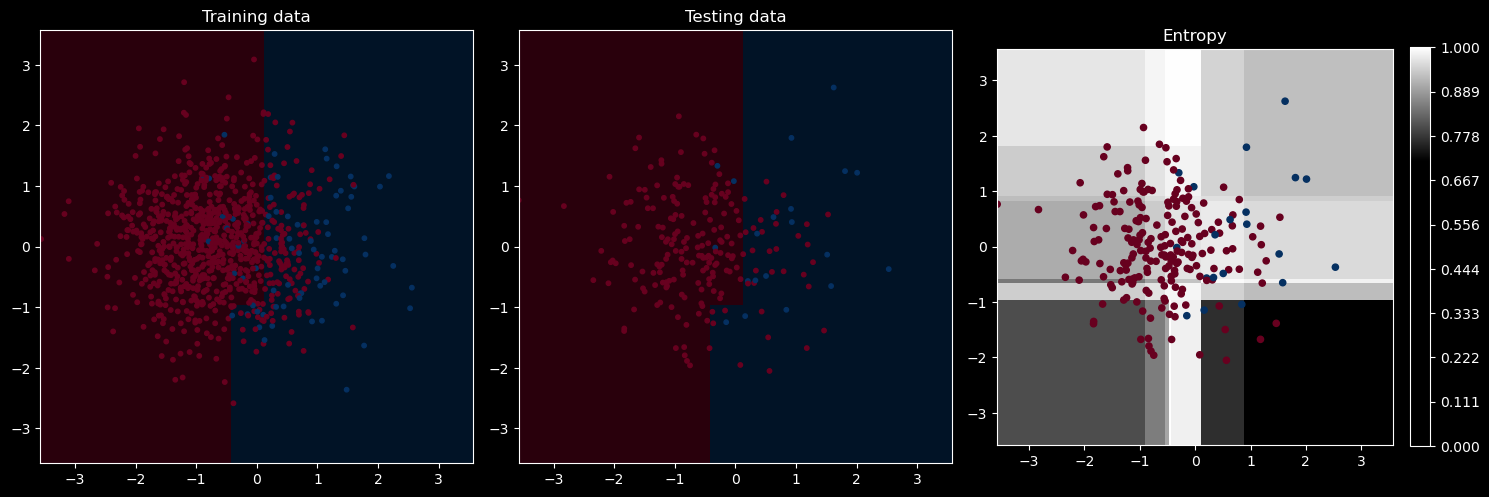

RandomForestClassifier(max_leaf_nodes=10, n_estimators=10)
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       200
           1       0.33      0.70      0.45        20

    accuracy                           0.85       220
   macro avg       0.65      0.78      0.68       220
weighted avg       0.91      0.85      0.87       220



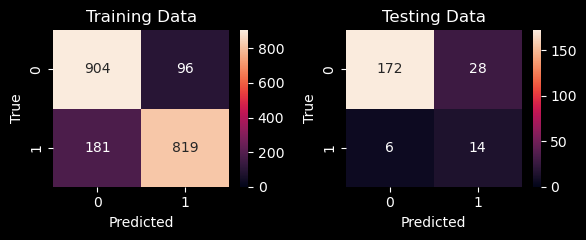

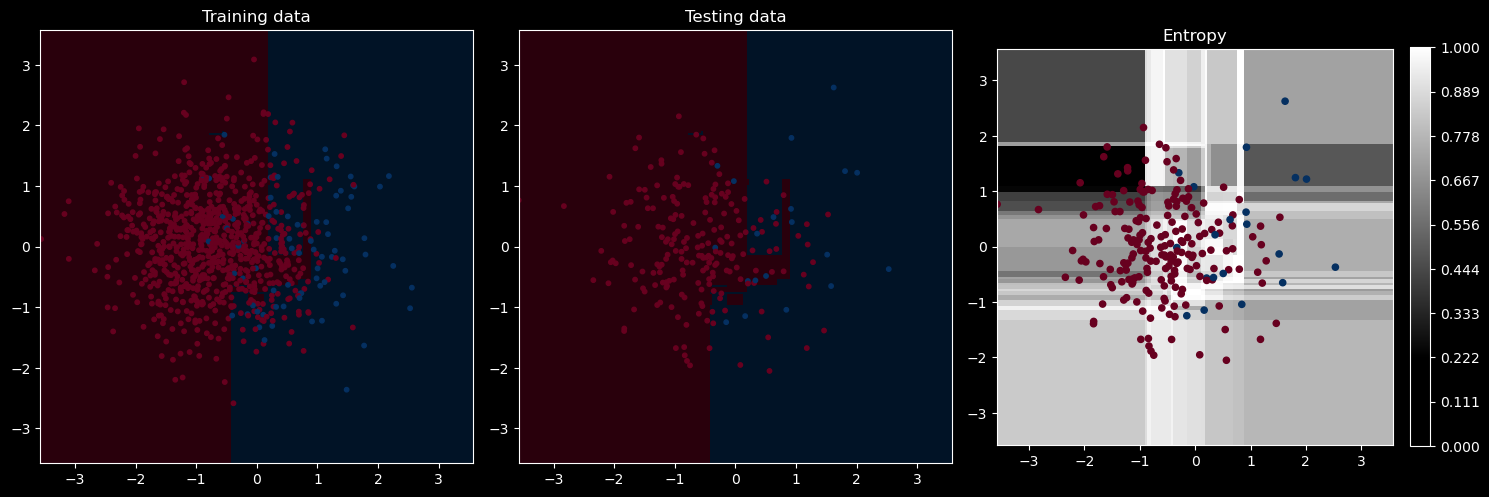

RandomForestClassifier(max_leaf_nodes=3)
              precision    recall  f1-score   support

           0       0.98      0.84      0.91       200
           1       0.35      0.85      0.50        20

    accuracy                           0.85       220
   macro avg       0.67      0.85      0.70       220
weighted avg       0.93      0.85      0.87       220



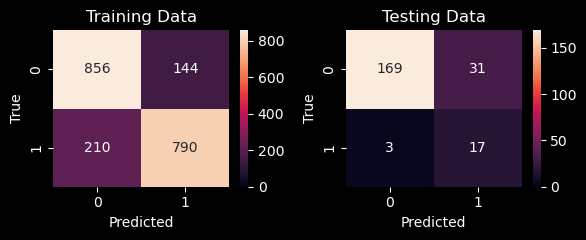

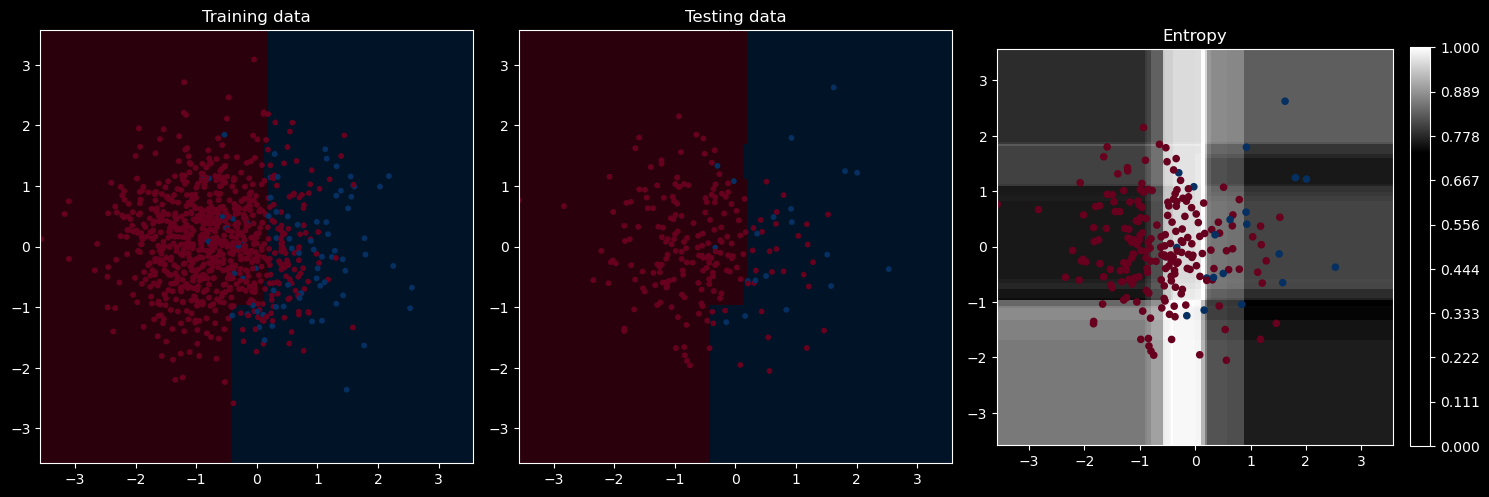

RandomForestClassifier(max_leaf_nodes=10)
              precision    recall  f1-score   support

           0       0.98      0.84      0.91       200
           1       0.34      0.80      0.48        20

    accuracy                           0.84       220
   macro avg       0.66      0.82      0.69       220
weighted avg       0.92      0.84      0.87       220



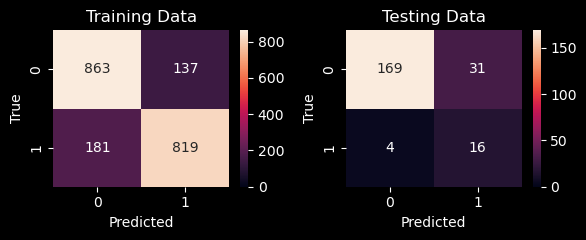

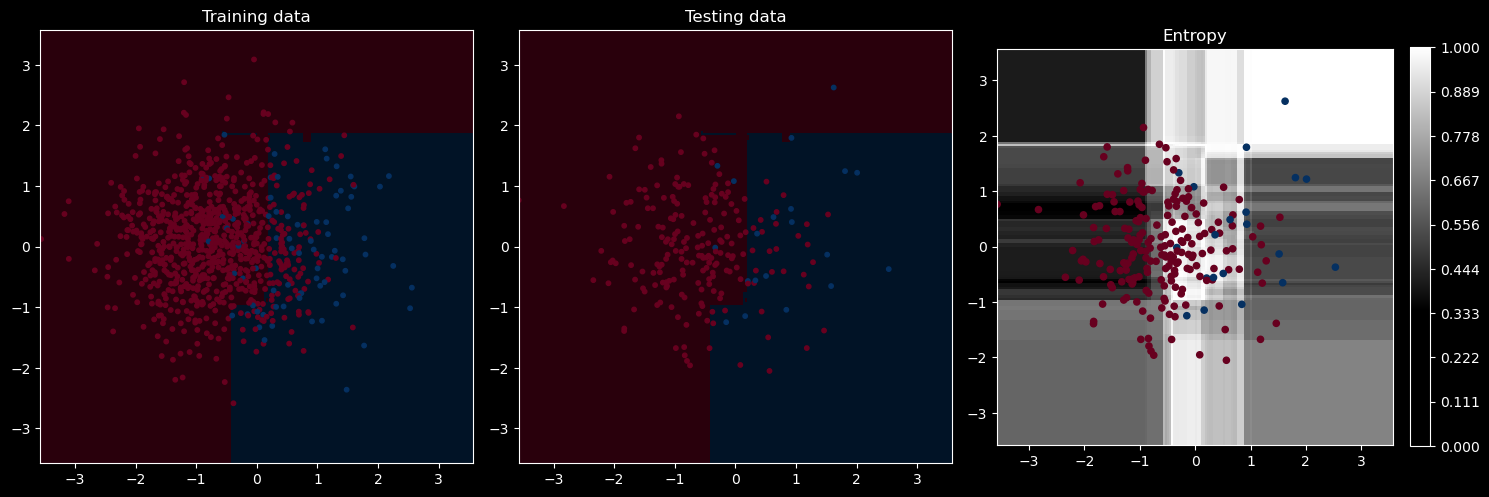

RandomForestClassifier(max_leaf_nodes=30)
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       200
           1       0.33      0.65      0.43        20

    accuracy                           0.85       220
   macro avg       0.64      0.76      0.67       220
weighted avg       0.90      0.85      0.87       220



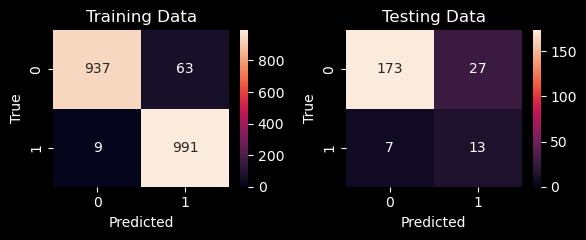

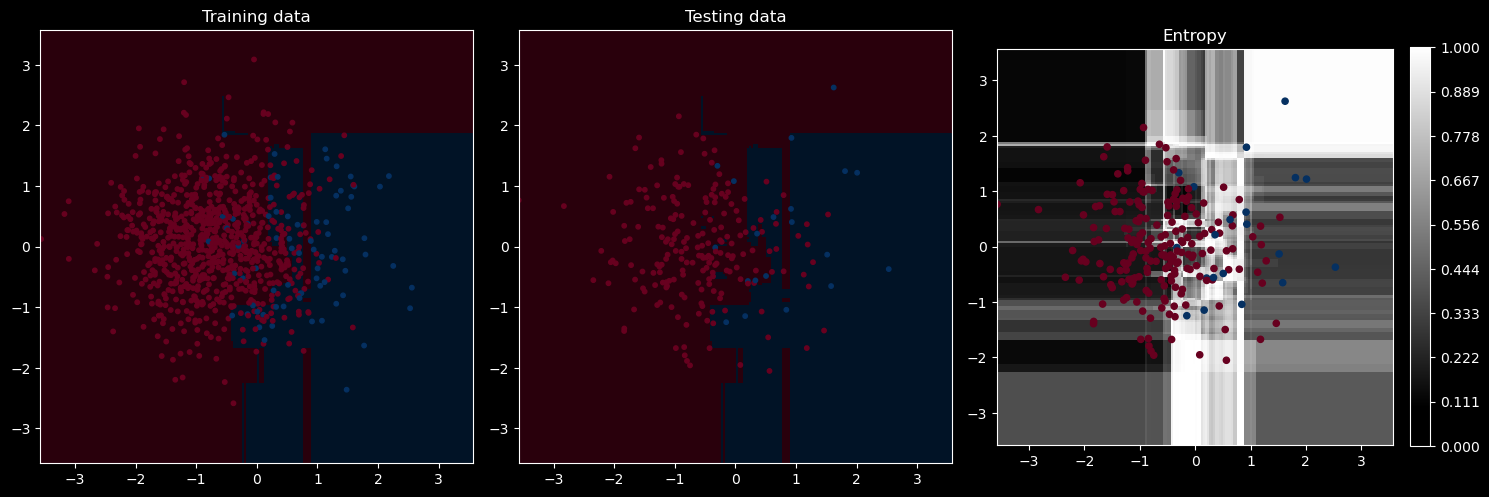

GradientBoostingClassifier(max_leaf_nodes=3, n_estimators=10)
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       200
           1       0.35      0.80      0.48        20

    accuracy                           0.85       220
   macro avg       0.66      0.82      0.70       220
weighted avg       0.92      0.85      0.87       220



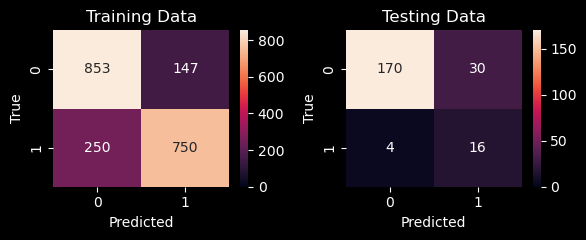

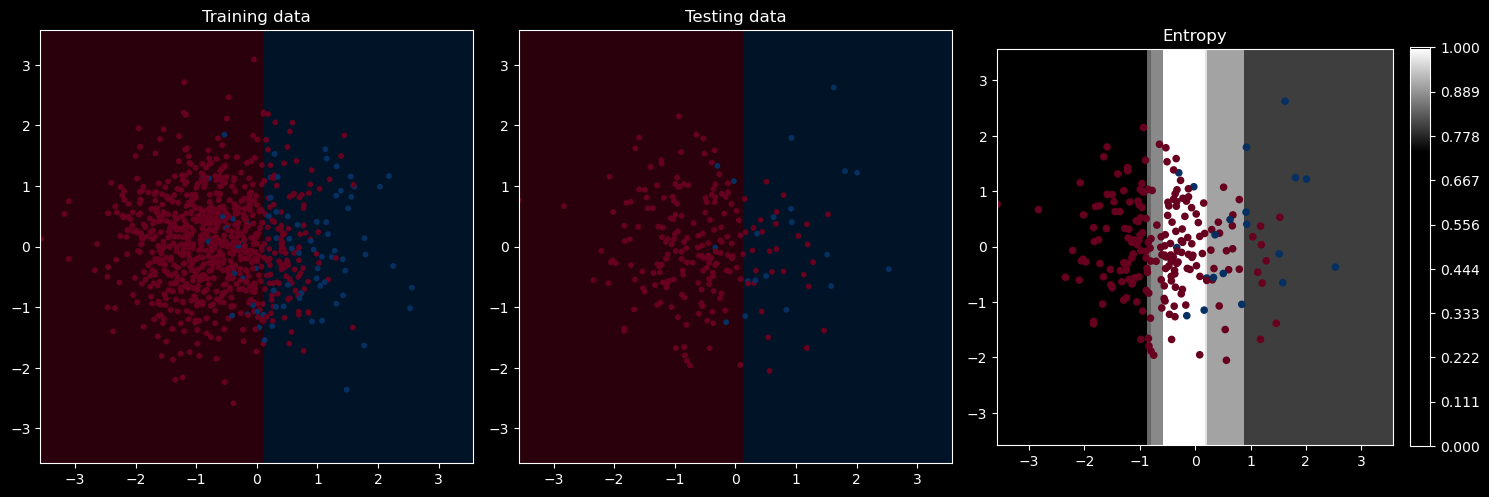

GradientBoostingClassifier(max_leaf_nodes=10, n_estimators=10)
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       200
           1       0.30      0.70      0.42        20

    accuracy                           0.83       220
   macro avg       0.63      0.77      0.66       220
weighted avg       0.91      0.83      0.86       220



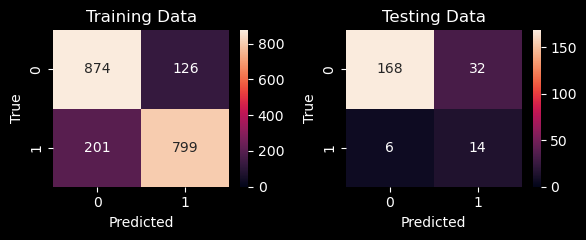

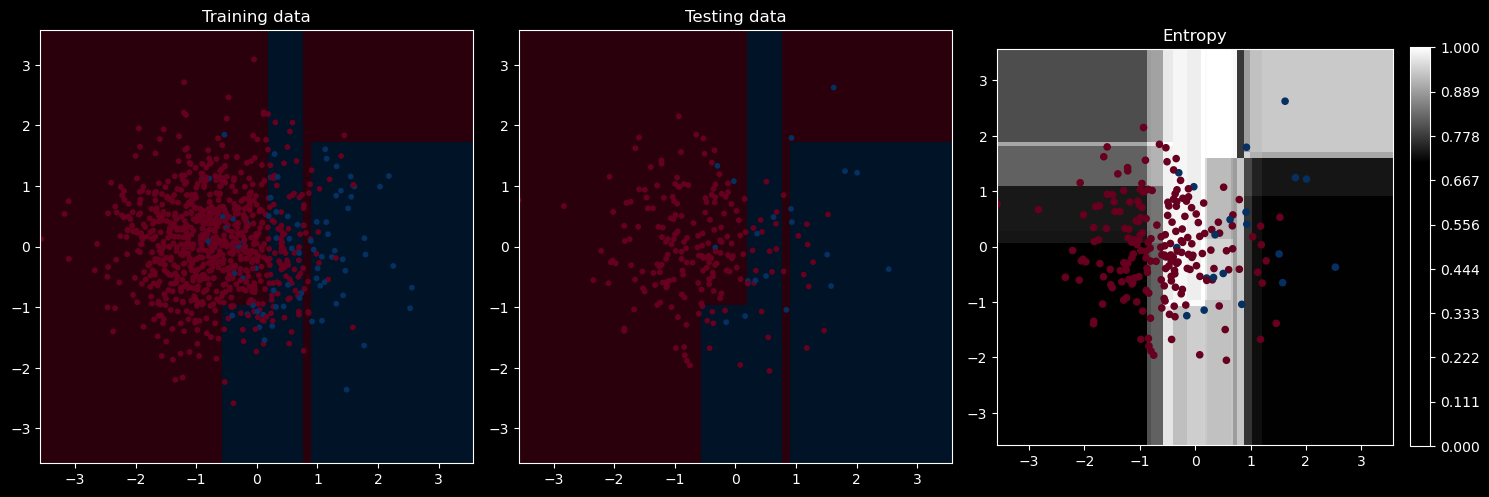

GradientBoostingClassifier(max_leaf_nodes=3)
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       200
           1       0.35      0.80      0.48        20

    accuracy                           0.85       220
   macro avg       0.66      0.82      0.70       220
weighted avg       0.92      0.85      0.87       220



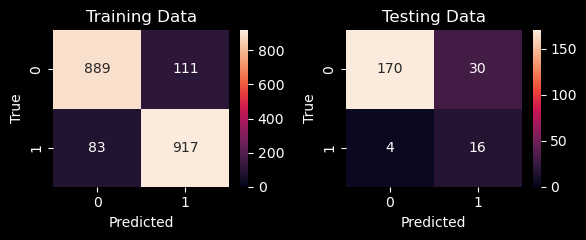

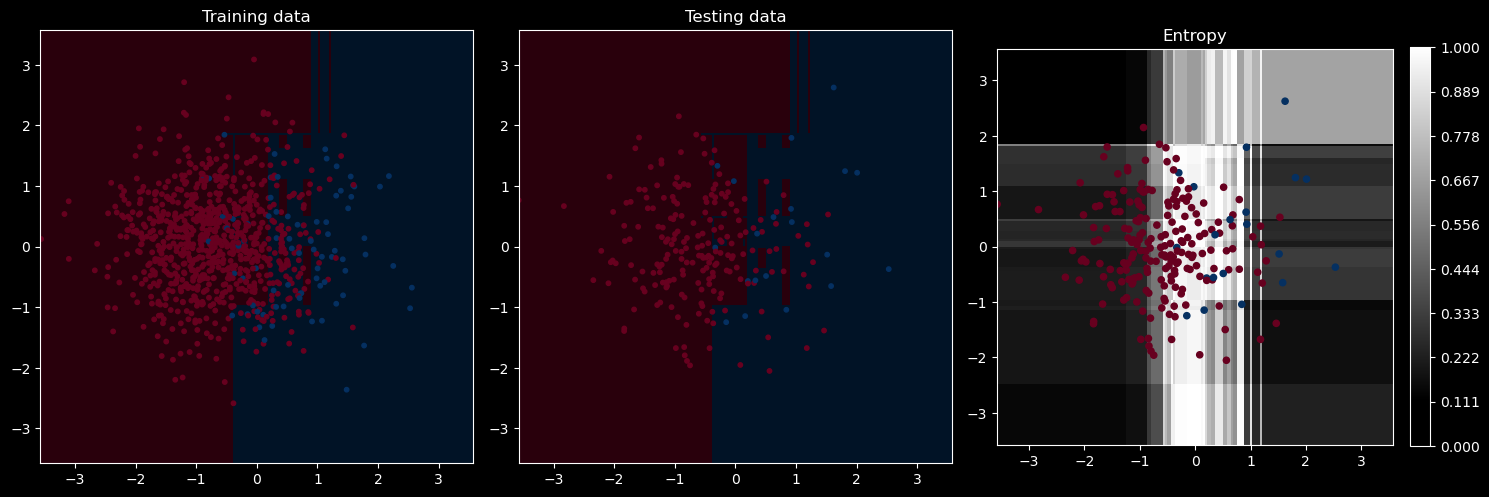

GradientBoostingClassifier(max_leaf_nodes=10)
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       200
           1       0.30      0.60      0.40        20

    accuracy                           0.84       220
   macro avg       0.63      0.73      0.65       220
weighted avg       0.90      0.84      0.86       220



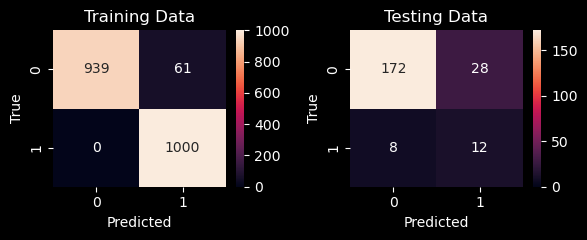

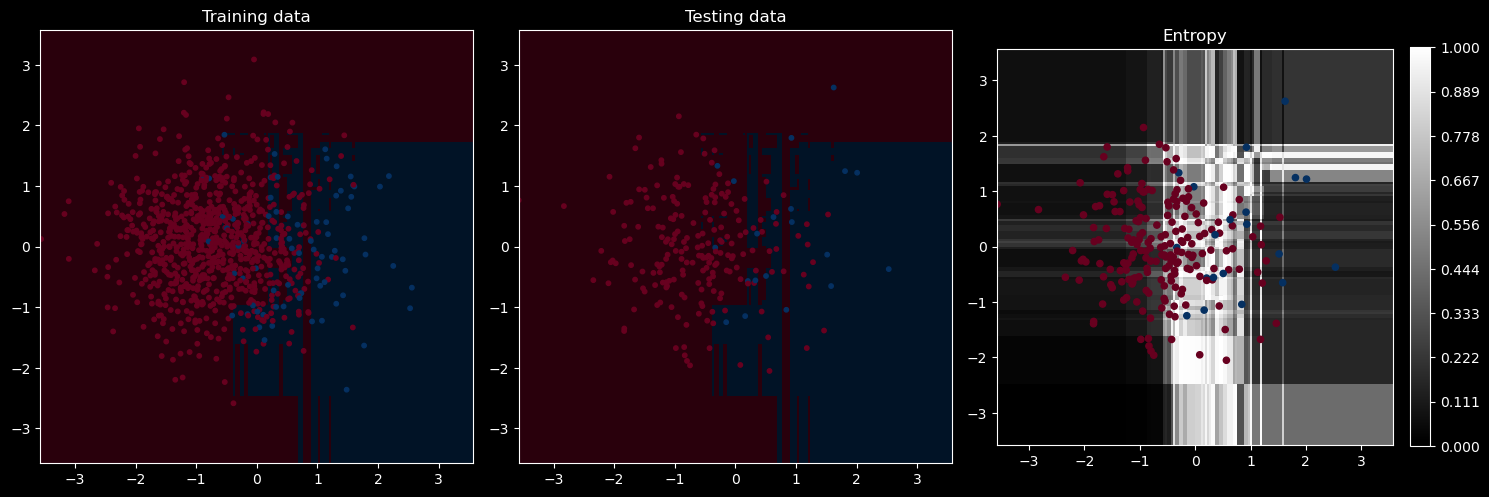

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

for m in models:
    m.fit(X_train_bal, y_train_bal)
    y_train_bal_pred = m.predict(X_train_bal).astype(int)
    y_test_bal_pred = m.predict(X_test).astype(int)
    
    print(m)
    print(classification_report(y_test, y_test_bal_pred))
    
    conf_matrix_train = confusion_matrix(y_train_bal, y_train_bal_pred)
    conf_matrix_test = confusion_matrix(y_test, y_test_bal_pred)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 2.5))
    
    sns.heatmap(conf_matrix_train, annot=True, vmin=0, fmt='d', ax=axes[0])
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("True")
    axes[0].set_title("Training Data")
    
    sns.heatmap(conf_matrix_test, annot=True, vmin=0, fmt='d', ax=axes[1])
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("True")
    axes[1].set_title("Testing Data")
    
    plt.tight_layout()
    plt.show()

    B, S = visualize_regions(m, MAX, 200)
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
    
    extent = [-MAX,MAX,-MAX,MAX]
    
    cmap = "RdBu"
    axes[0].imshow(B, interpolation='none', extent=extent,cmap=cmap, alpha=0.4)
    axes[0].scatter(X_train[:,0], X_train[:,1], c=y_train, s=10, cmap=cmap);
    axes[0].set_aspect('equal')
    axes[0].set_title('Training data');
    
    axes[1].imshow(B, interpolation='none', extent=extent,cmap=cmap, alpha=0.4)
    axes[1].scatter(X_test[:,0], X_test[:,1], c=y_test, s=10, cmap=cmap);
    axes[1].set_aspect('equal')
    axes[1].set_title('Testing data');
    
    im = axes[2].imshow(S, interpolation='none', extent=extent,cmap='gray')
    axes[2].scatter(X_test[:,0], X_test[:,1], c=y_test, s=20, cmap=cmap);
    axes[2].set_aspect('equal')
    axes[2].set_title('Entropy')
    cbar = fig.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04)
    cbar.set_ticks(np.linspace(0, math.log(y.max()+1,2), 10))

    plt.tight_layout()
    plt.show()
# end

# Modeling w/ resampling via `imblearn`

In [10]:
#!pip install imbalanced-learn

In [27]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y
)

# Apply random oversampling
ros = RandomOverSampler()

X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

print("Original data:")
print(pd.Series(y).value_counts())
print()
print("Training data:")
print(pd.Series(y_train_res).value_counts())
print()
print("Testing data:")
print(pd.Series(y_test).value_counts())

Original data:
0    1000
1     100
Name: count, dtype: int64

Training data:
0    800
1    800
Name: count, dtype: int64

Testing data:
0    200
1     20
Name: count, dtype: int64


LogisticRegression()
              precision    recall  f1-score   support

           0       0.98      0.82      0.89       200
           1       0.31      0.80      0.44        20

    accuracy                           0.82       220
   macro avg       0.64      0.81      0.67       220
weighted avg       0.92      0.82      0.85       220



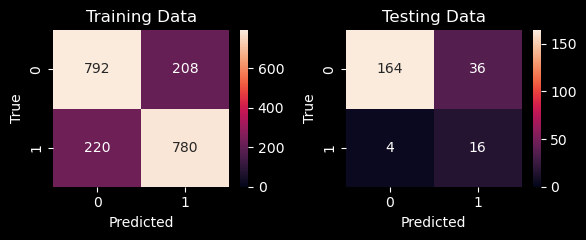

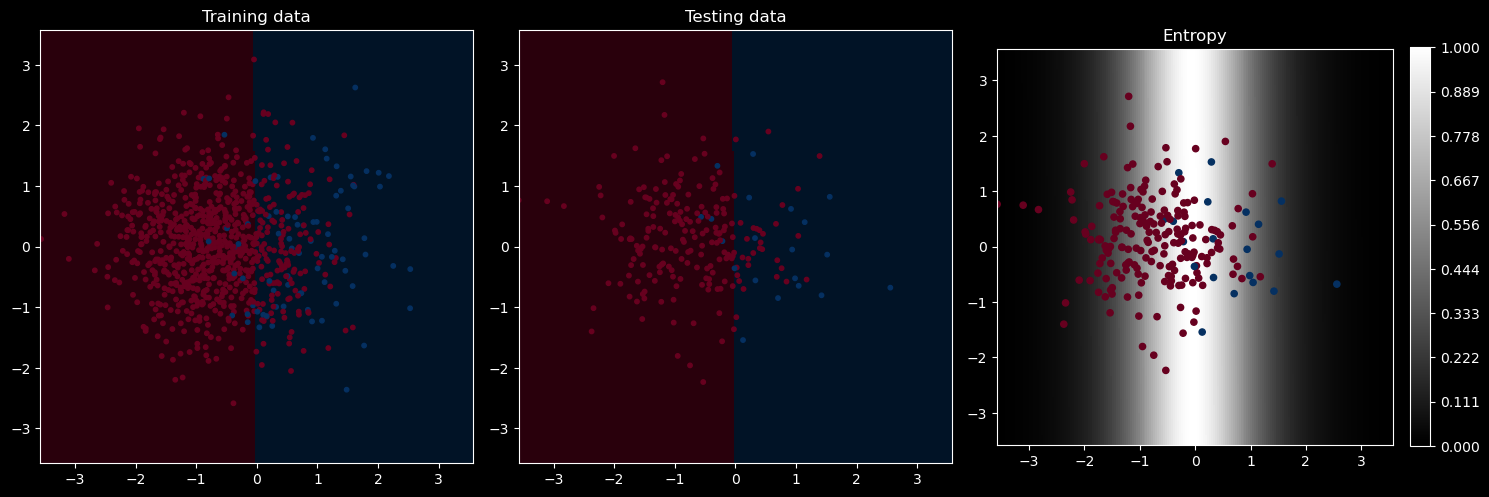

KNeighborsClassifier(n_neighbors=1)
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       200
           1       0.63      0.85      0.72        20

    accuracy                           0.94       220
   macro avg       0.81      0.90      0.85       220
weighted avg       0.95      0.94      0.94       220



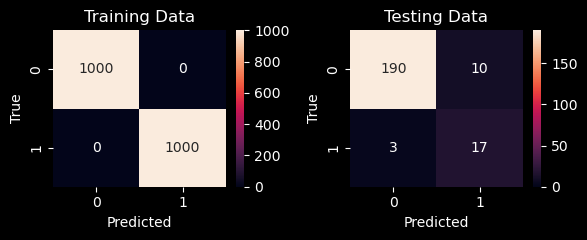

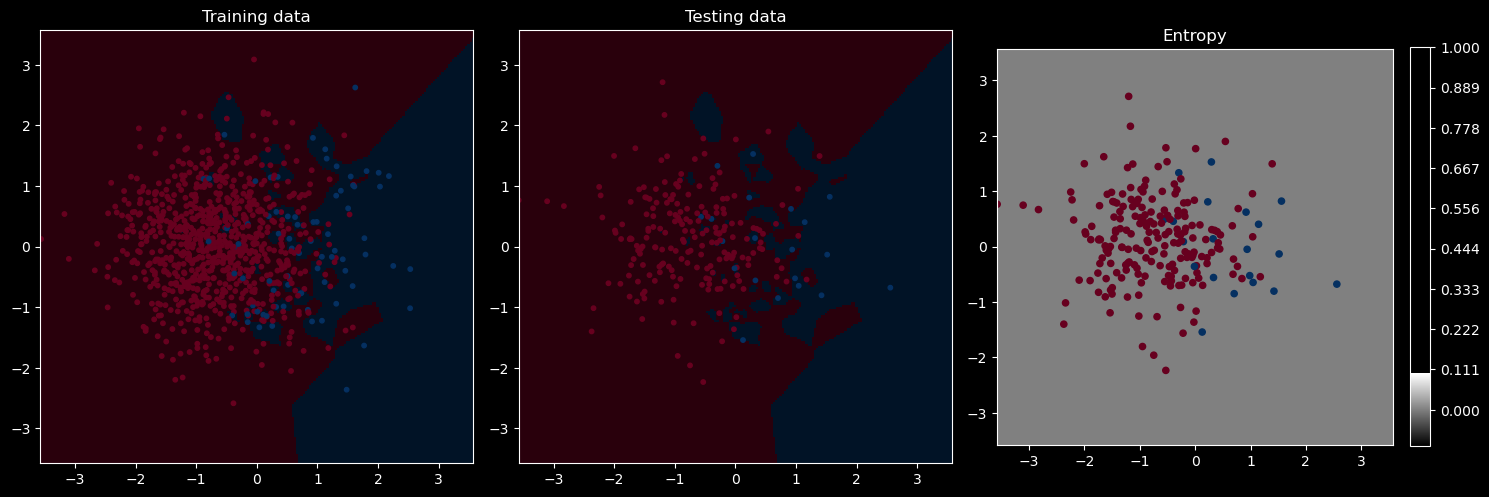

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.98      0.91      0.95       200
           1       0.49      0.85      0.62        20

    accuracy                           0.90       220
   macro avg       0.73      0.88      0.78       220
weighted avg       0.94      0.90      0.92       220



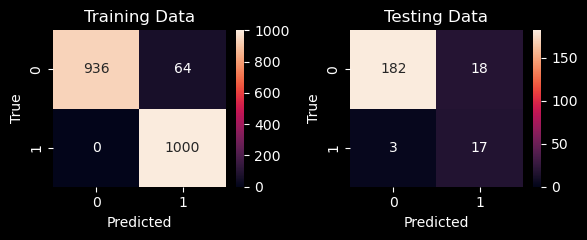

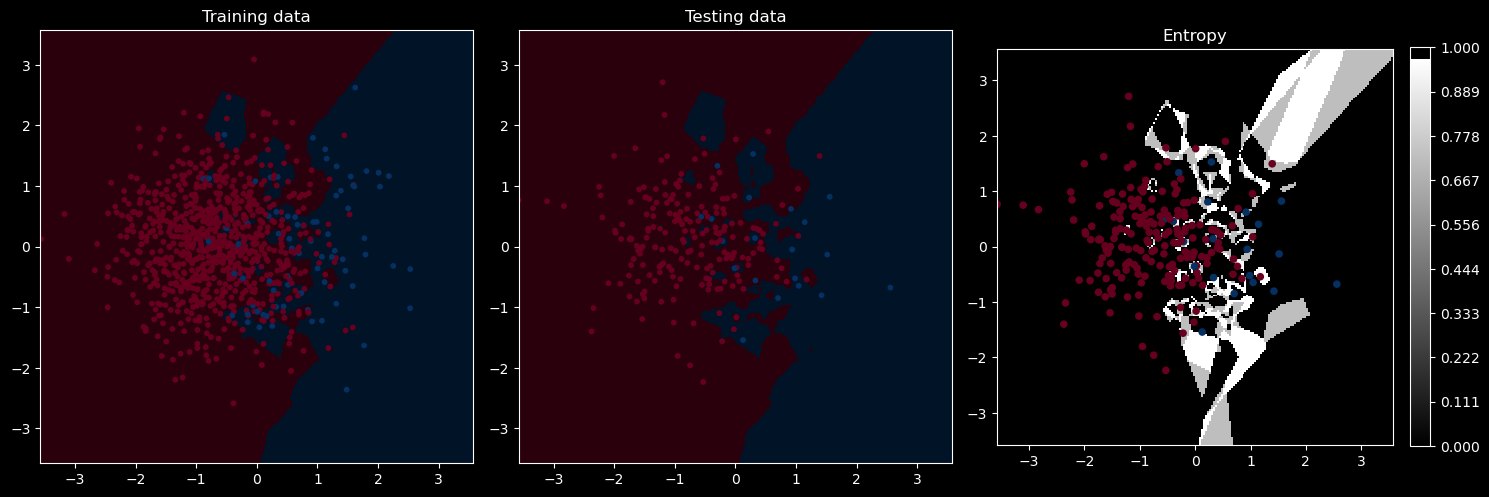

KNeighborsClassifier(n_neighbors=10)
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       200
           1       0.42      0.90      0.57        20

    accuracy                           0.88       220
   macro avg       0.70      0.89      0.75       220
weighted avg       0.94      0.88      0.90       220



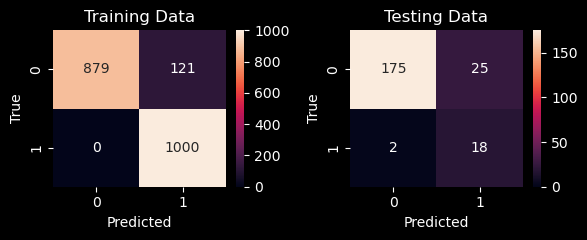

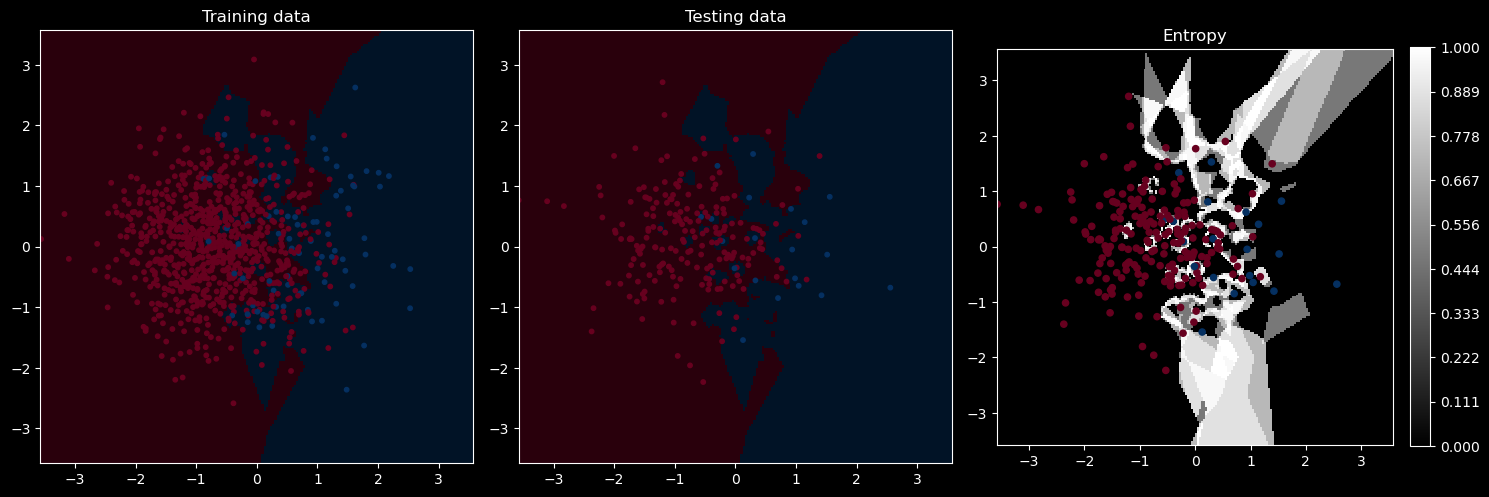

KNeighborsClassifier(n_neighbors=50)
              precision    recall  f1-score   support

           0       0.97      0.83      0.89       200
           1       0.31      0.75      0.43        20

    accuracy                           0.82       220
   macro avg       0.64      0.79      0.66       220
weighted avg       0.91      0.82      0.85       220



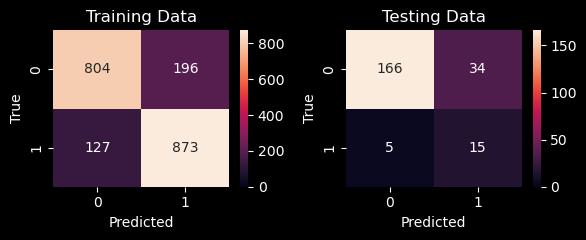

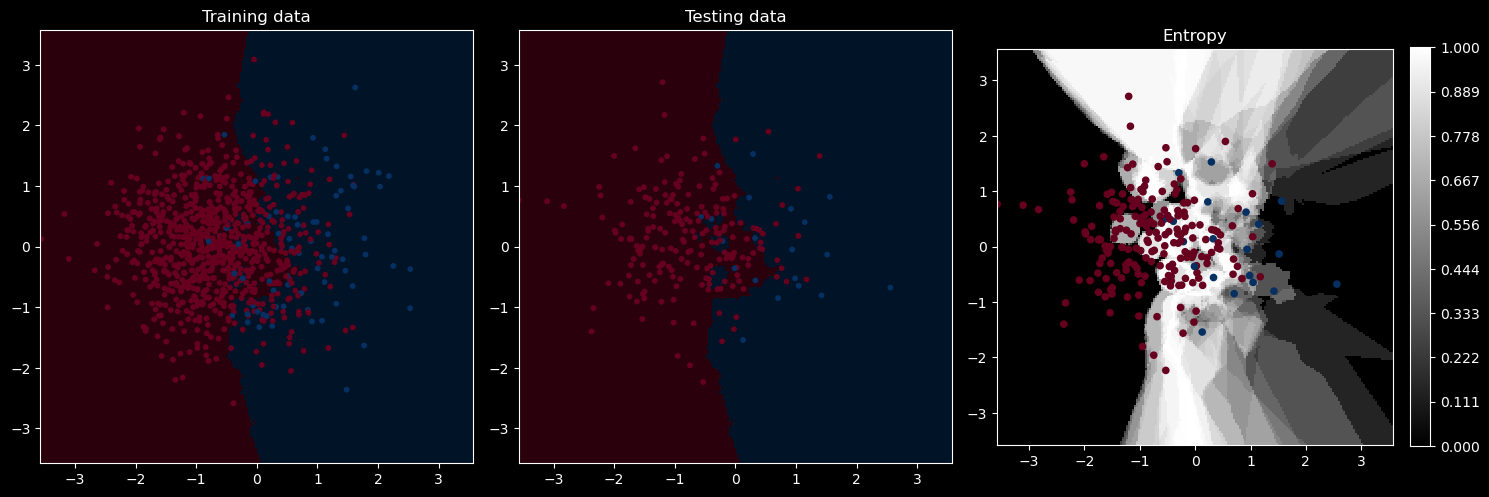

RandomForestClassifier(max_leaf_nodes=3, n_estimators=10)
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       200
           1       0.38      0.75      0.50        20

    accuracy                           0.86       220
   macro avg       0.67      0.81      0.71       220
weighted avg       0.92      0.86      0.88       220



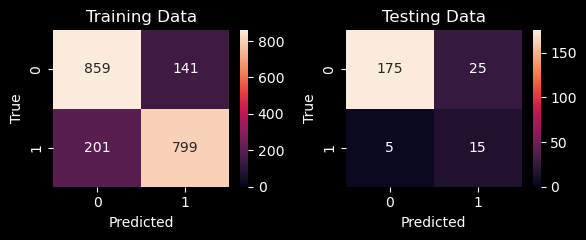

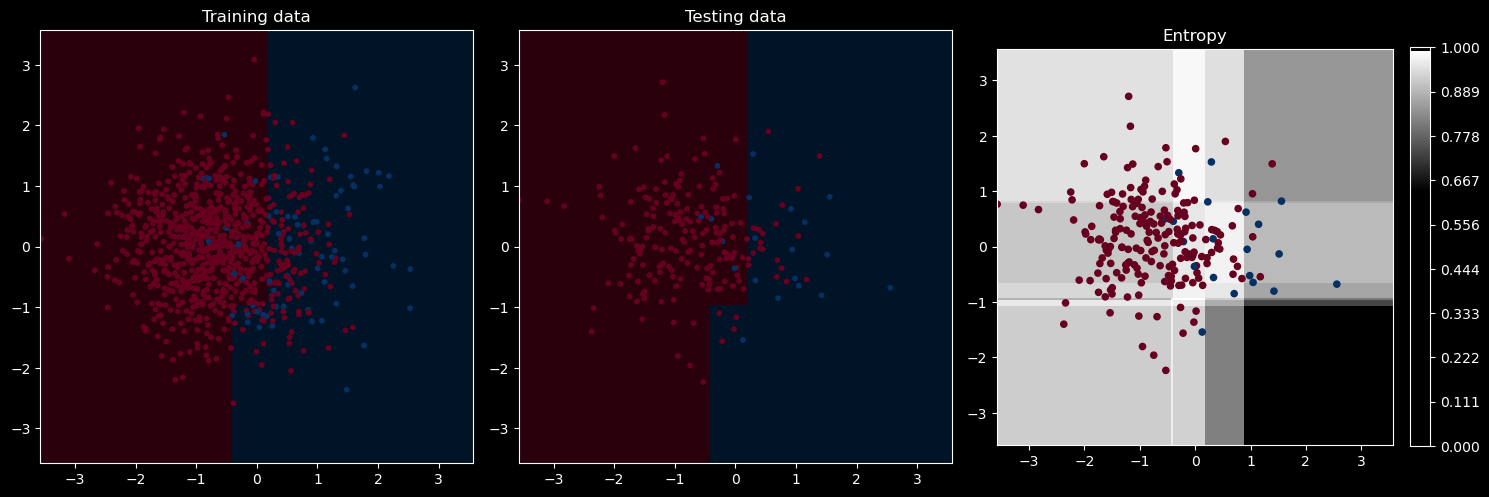

RandomForestClassifier(max_leaf_nodes=10, n_estimators=10)
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       200
           1       0.40      0.80      0.53        20

    accuracy                           0.87       220
   macro avg       0.69      0.84      0.73       220
weighted avg       0.93      0.87      0.89       220



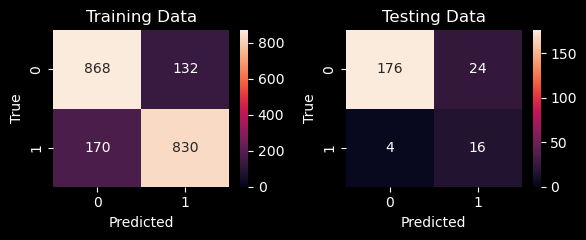

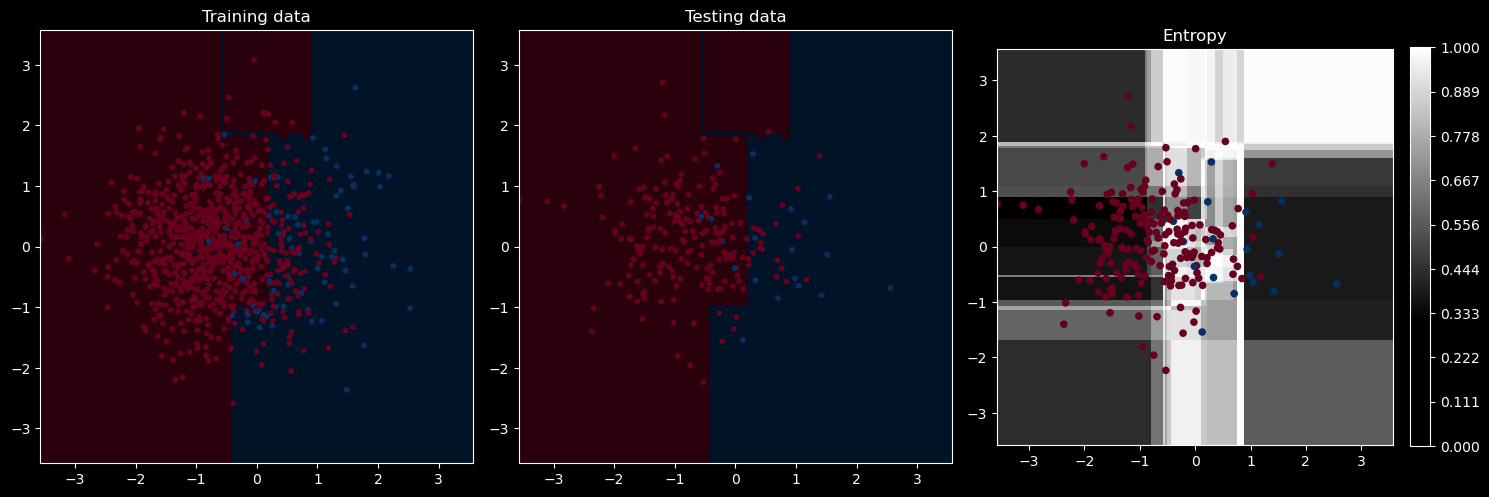

RandomForestClassifier(max_leaf_nodes=3)
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       200
           1       0.35      0.75      0.48        20

    accuracy                           0.85       220
   macro avg       0.66      0.80      0.69       220
weighted avg       0.92      0.85      0.87       220



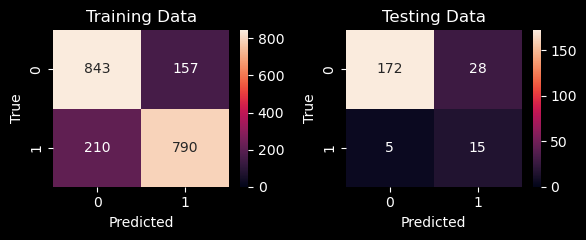

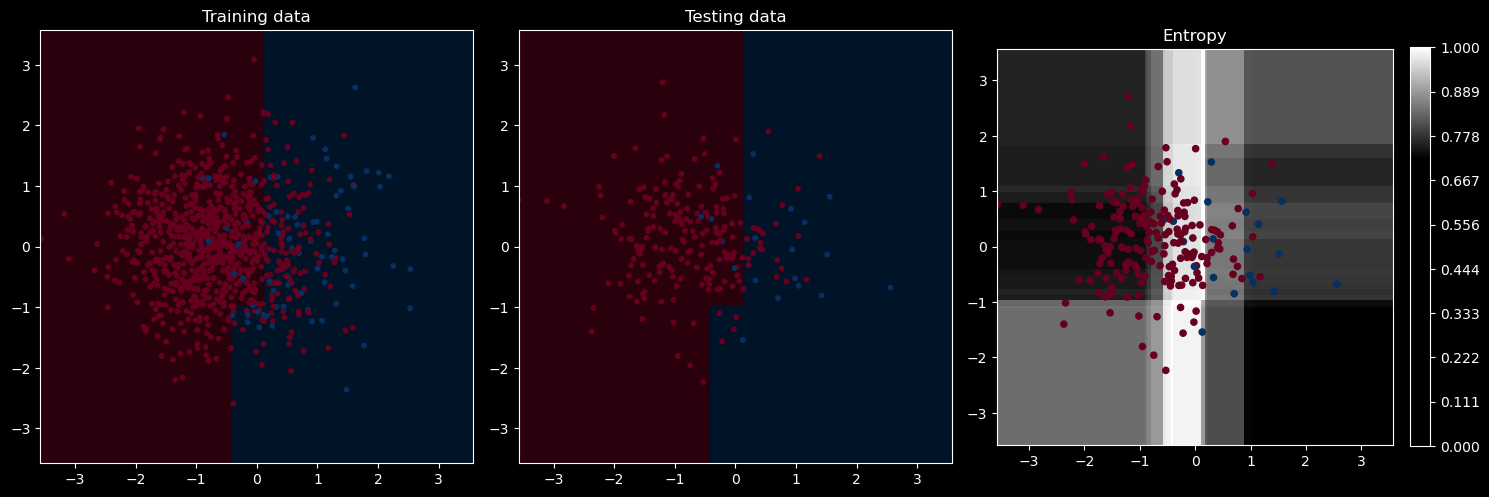

RandomForestClassifier(max_leaf_nodes=10)
              precision    recall  f1-score   support

           0       0.98      0.88      0.92       200
           1       0.39      0.80      0.52        20

    accuracy                           0.87       220
   macro avg       0.68      0.84      0.72       220
weighted avg       0.92      0.87      0.89       220



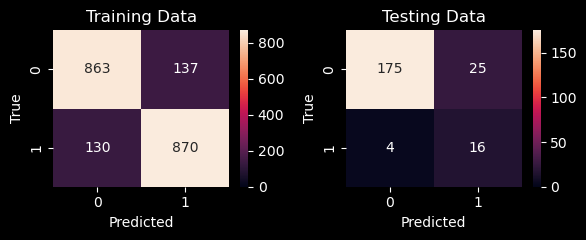

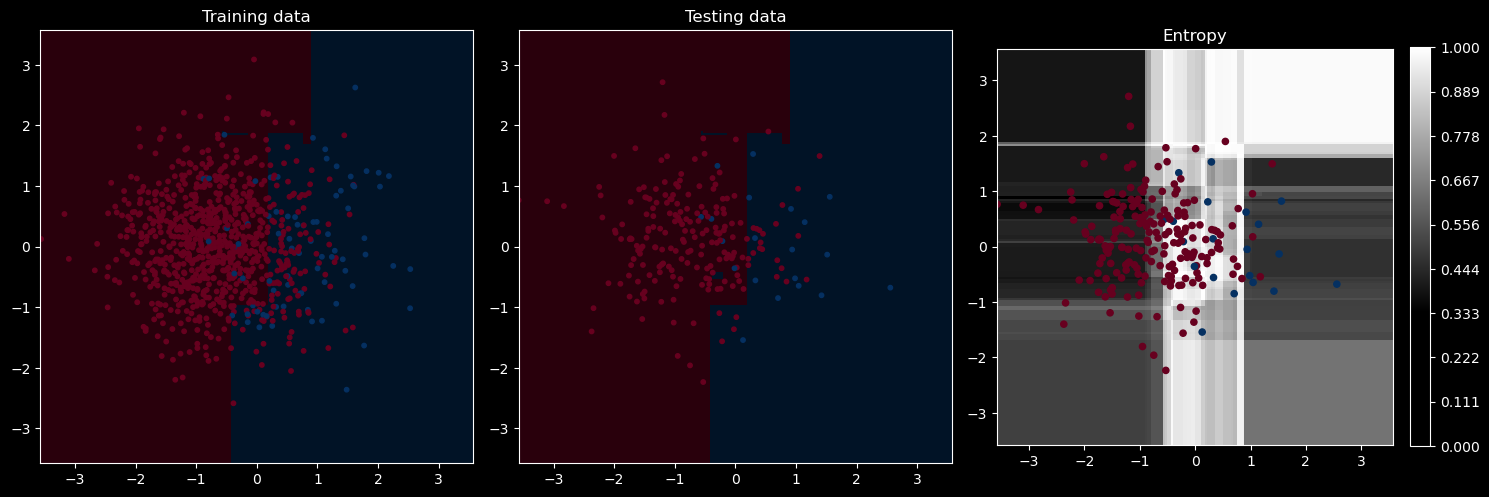

RandomForestClassifier(max_leaf_nodes=30)
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       200
           1       0.53      0.85      0.65        20

    accuracy                           0.92       220
   macro avg       0.76      0.89      0.80       220
weighted avg       0.94      0.92      0.93       220



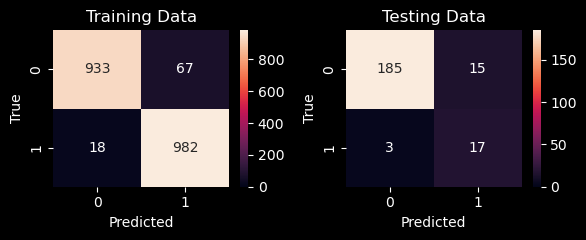

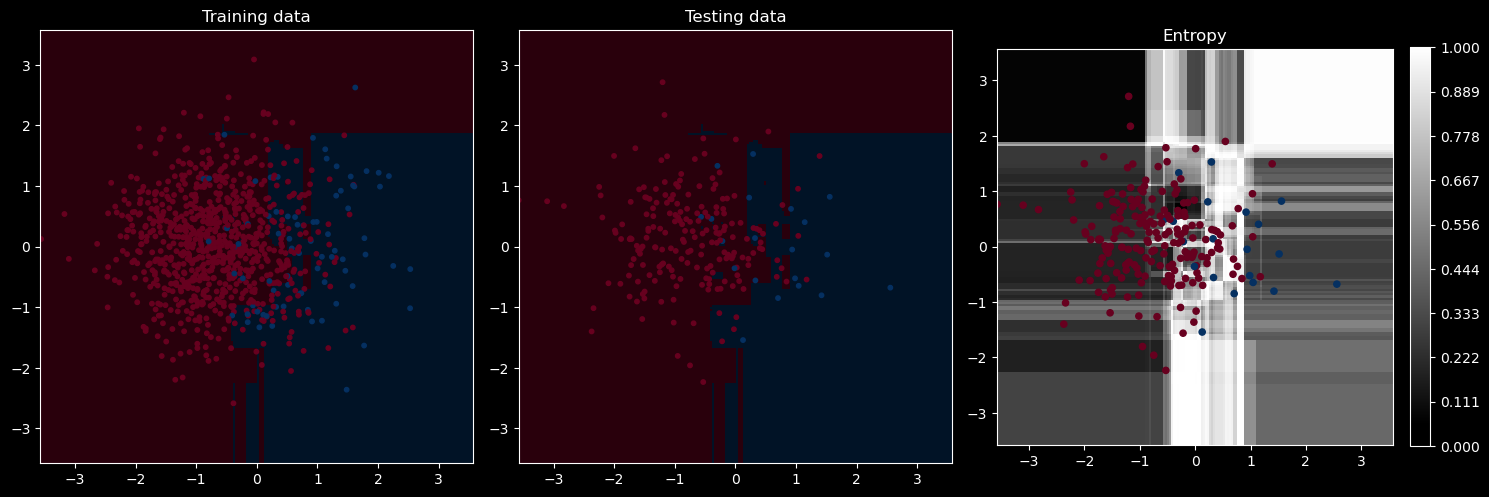

GradientBoostingClassifier(max_leaf_nodes=3, n_estimators=10)
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       200
           1       0.38      0.75      0.51        20

    accuracy                           0.87       220
   macro avg       0.68      0.81      0.72       220
weighted avg       0.92      0.87      0.89       220



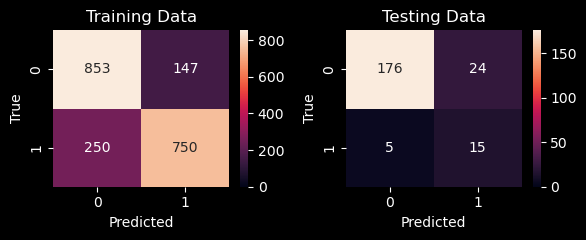

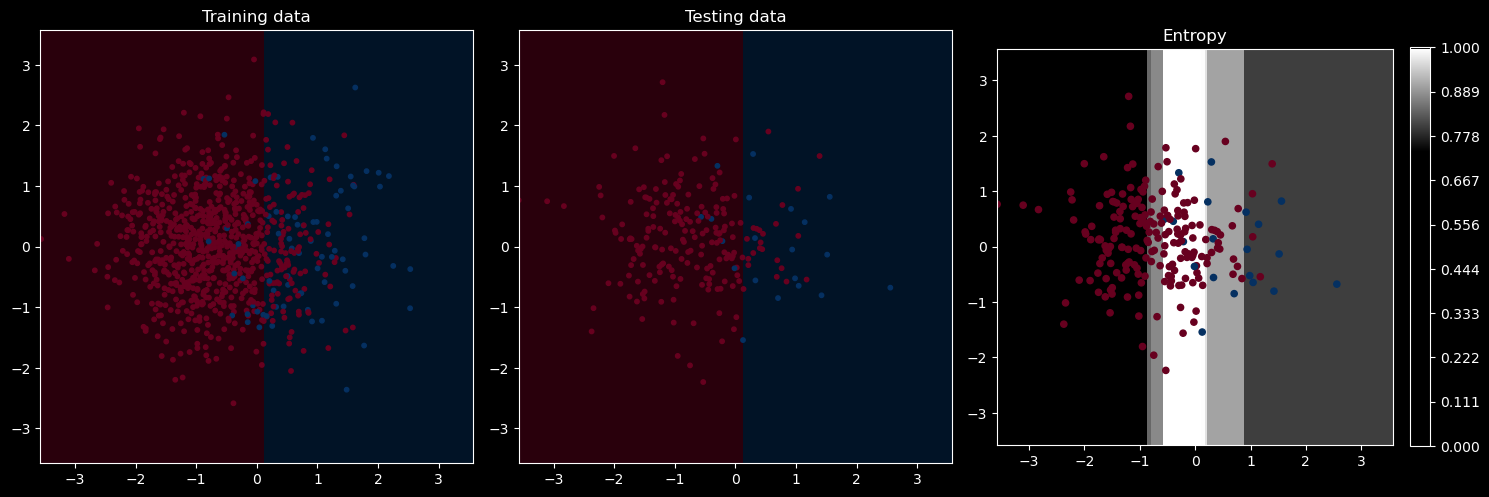

GradientBoostingClassifier(max_leaf_nodes=10, n_estimators=10)
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       200
           1       0.38      0.75      0.51        20

    accuracy                           0.87       220
   macro avg       0.68      0.81      0.72       220
weighted avg       0.92      0.87      0.89       220



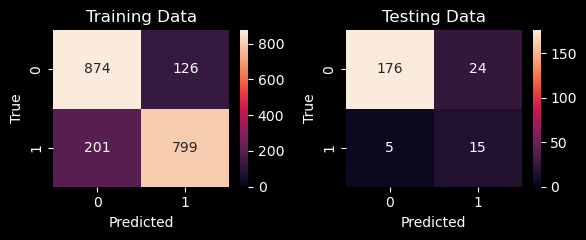

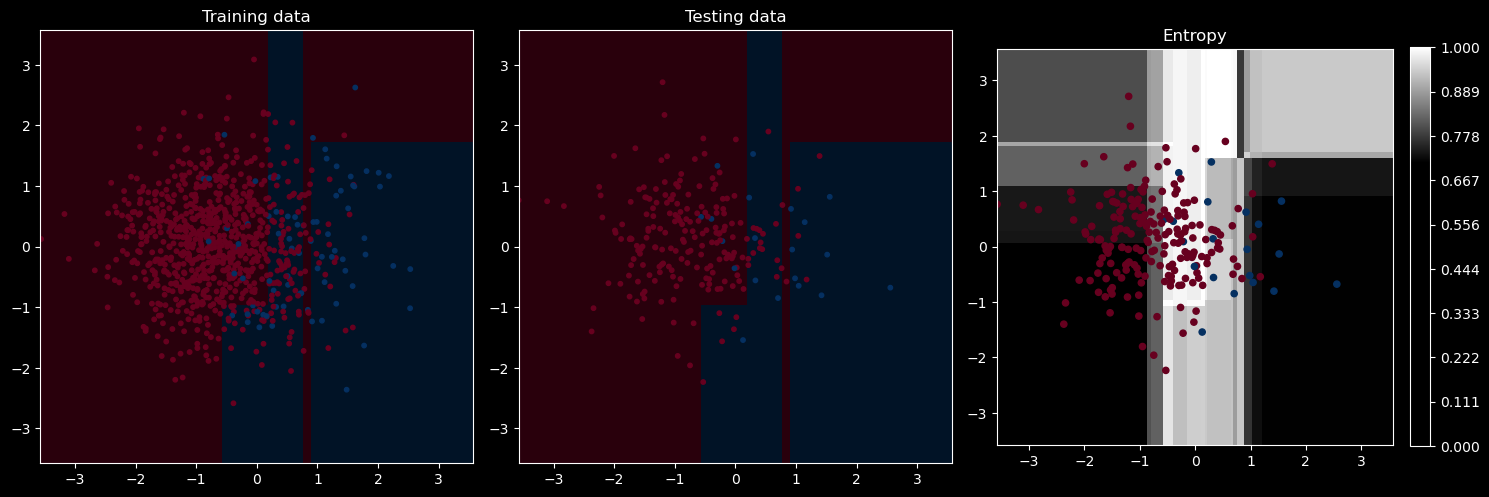

GradientBoostingClassifier(max_leaf_nodes=3)
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       200
           1       0.45      0.90      0.60        20

    accuracy                           0.89       220
   macro avg       0.72      0.90      0.77       220
weighted avg       0.94      0.89      0.91       220



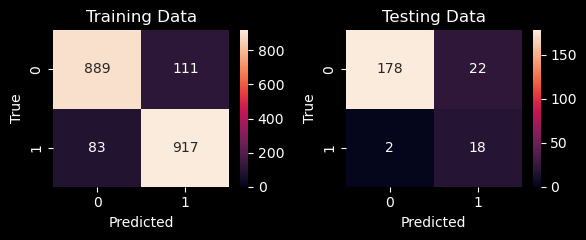

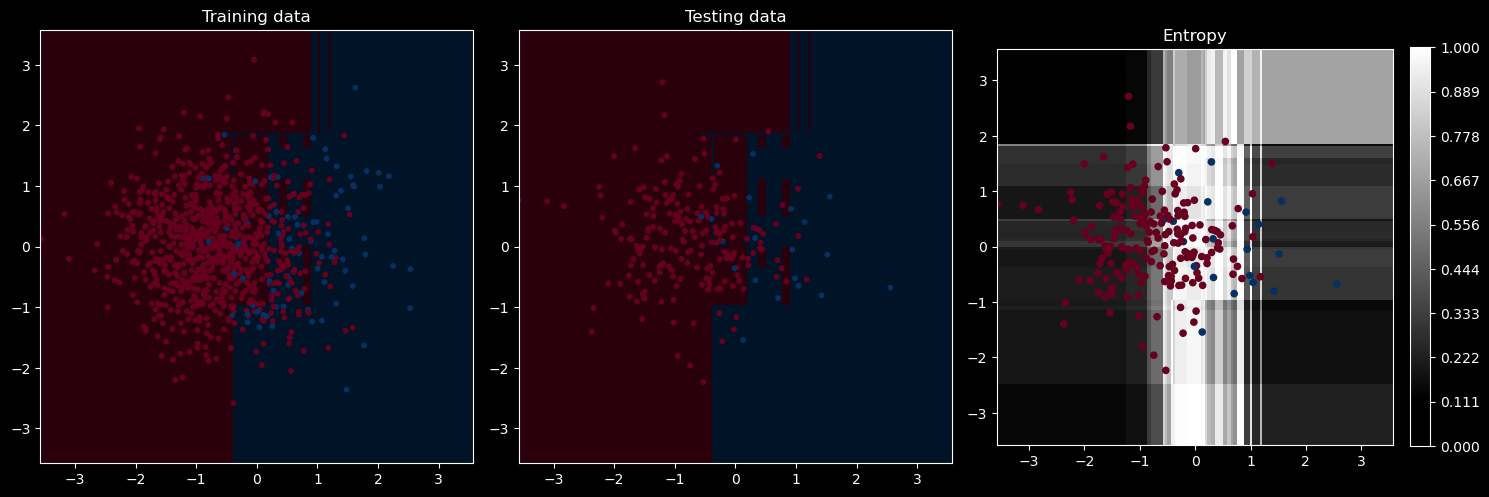

GradientBoostingClassifier(max_leaf_nodes=10)
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       200
           1       0.56      0.95      0.70        20

    accuracy                           0.93       220
   macro avg       0.78      0.94      0.83       220
weighted avg       0.96      0.93      0.94       220



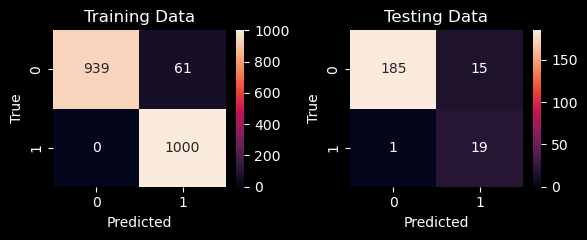

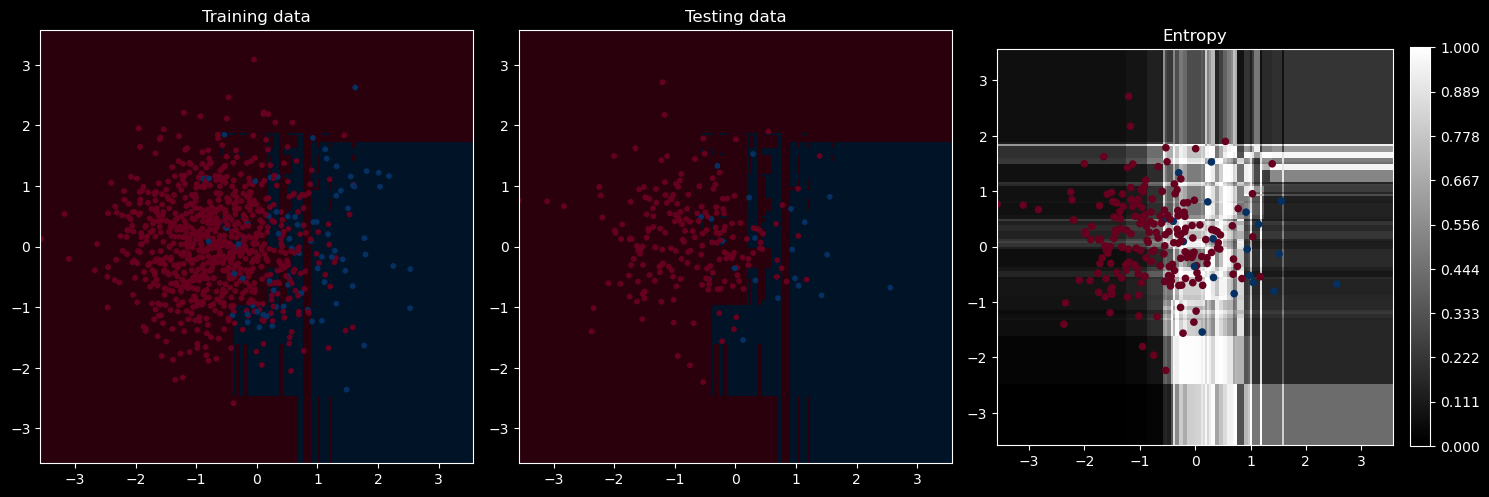

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

for m in models:
    m.fit(X_train_bal, y_train_bal)
    y_train_bal_pred = m.predict(X_train_bal).astype(int)
    y_test_bal_pred = m.predict(X_test).astype(int)
    
    print(m)
    print(classification_report(y_test, y_test_bal_pred))
    
    conf_matrix_train = confusion_matrix(y_train_bal, y_train_bal_pred)
    conf_matrix_test = confusion_matrix(y_test, y_test_bal_pred)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 2.5))
    
    sns.heatmap(conf_matrix_train, annot=True, vmin=0, fmt='d', ax=axes[0])
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("True")
    axes[0].set_title("Training Data")
    
    sns.heatmap(conf_matrix_test, annot=True, vmin=0, fmt='d', ax=axes[1])
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("True")
    axes[1].set_title("Testing Data")
    
    plt.tight_layout()
    plt.show()

    B, S = visualize_regions(m, MAX, 200)
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
    
    extent = [-MAX,MAX,-MAX,MAX]
    
    cmap = "RdBu"
    axes[0].imshow(B, interpolation='none', extent=extent,cmap=cmap, alpha=0.4)
    axes[0].scatter(X_train[:,0], X_train[:,1], c=y_train, s=10, cmap=cmap);
    axes[0].set_aspect('equal')
    axes[0].set_title('Training data');
    
    axes[1].imshow(B, interpolation='none', extent=extent,cmap=cmap, alpha=0.4)
    axes[1].scatter(X_test[:,0], X_test[:,1], c=y_test, s=10, cmap=cmap);
    axes[1].set_aspect('equal')
    axes[1].set_title('Testing data');
    
    im = axes[2].imshow(S, interpolation='none', extent=extent,cmap='gray')
    axes[2].scatter(X_test[:,0], X_test[:,1], c=y_test, s=20, cmap=cmap);
    axes[2].set_aspect('equal')
    axes[2].set_title('Entropy')
    cbar = fig.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04)
    cbar.set_ticks(np.linspace(0, math.log(y.max()+1,2), 10))

    plt.tight_layout()
    plt.show()
# end